In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline
import math
import seaborn as sns

import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter

In [26]:
def moving_average(interval, windowsize):
    window = np.ones(int(windowsize)) / float(windowsize)
    re = np.convolve(interval, window, 'same')
    return re

In [27]:
def RGB_to_Hex(rgb):
    """
    RGB格式颜色转换为16进制颜色格式
    Args:
        rgb: tuple

    Returns:
        color: str
    """
    RGB = list(rgb)
    color = '#'
    for i in RGB:
        num = int(i)
        color += str(hex(num))[-2:].replace('x', '0').upper()
    return color
    
def generate_colors(N=12,colormap='hsv'):
    """
    生成颜色列表
    Args:
        N: 生成颜色列表中的颜色个数
        colormap: plt中的色表，如'cool'、'autumn'等

    Returns:
        rgb_list: list, 每个值(r,g,b)在0~255范围
        hex_list: list, 每个值为十六进制颜色码类似：#FAEBD7
    """
    step = max(int(255/N),1)
    cmap = plt.get_cmap(colormap)
    rgb_list = []
    hex_list = []
    for i in range(N):
        id = step*i # cmap(int)->(r,g,b,a) in 0~1
        id = 255 if id>255 else id
        rgba_color = cmap(id)
        rgb = [int(d*255) for d in rgba_color[:3]]
        rgb_list.append(tuple(rgb))
        hex_list.append(RGB_to_Hex(rgb))
    return rgb_list,hex_list
    
# 生成 6个冷色调的颜色
rgb_list,hex_list = generate_colors(6,'cool')
print(rgb_list)
print(hex_list)


[(0, 255, 255), (42, 213, 255), (84, 171, 255), (126, 129, 255), (168, 87, 255), (210, 45, 255)]
['#00FFFF', '#2AD5FF', '#54ABFF', '#7E81FF', '#A857FF', '#D22DFF']


In [28]:
rgb_list,hex_list = generate_colors(2,'cool')
print(rgb_list)
print(hex_list)

[(0, 255, 255), (127, 128, 255)]
['#00FFFF', '#7F80FF']


## Data of Simple Mass-Spring Dynamics

### Casual Emergence

[(0, 255, 255), (127, 128, 255)]
['#00FFFF', '#7F80FF']


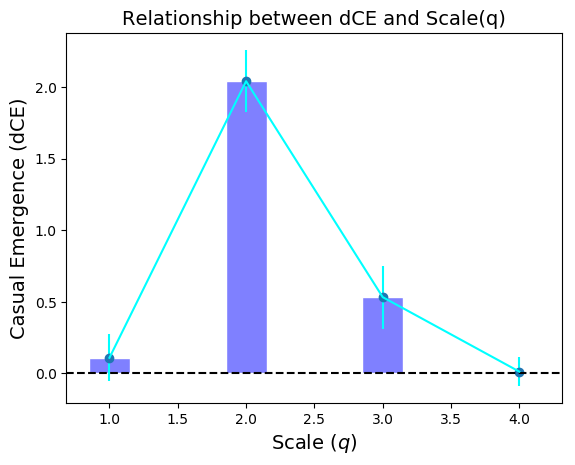

In [29]:
rgb_list,hex_list = generate_colors(2,'cool')
print(rgb_list)
print(hex_list)
#Spring data
ces=[[-0.17456650733947754, 0.05525827407836914, 0.029614925384521484, 0.13303351402282715, 0.08229994773864746,
 -0.07602143287658691, -0.007184028625488281, -0.09856224060058594, 0.16203927993774414, 0.018466472625732422], 
 [0.2860025564829507, 0.7812835375467935, 0.6914962927500405, 0.6563100814819336, 0.6812988122304282,
  0.7643272876739502, 0.5325589179992676, 0.38224633534749364, 0.4910848935445151, 0.061532020568847656],
   [1.9260797500610352, 2.092711925506592, 2.1987204551696777, 2.4376766681671143, 1.8637847900390625, 
   1.7785601615905762, 2.1332645416259766, 2.32515287399292, 1.8358583450317383, 1.8227131366729736],
    [0.5043153762817383, 0.14768171310424805, 0.12015008926391602, -0.05621337890625, 0.010374784469604492, 
    0.029281139373779297, 0.1994495391845703, -0.1200571060180664, 0.16694188117980957, 0.09185647964477539]]

scales=torch.Tensor([4,3,2,1])
means=[]
stds=[]

for ce in ces:
    m=np.mean(ce)
    std=np.std(ce)
    means.append(m)
    stds.append(std)

#plt.figure(figsize=(3.92*2,2.66*2), dpi = 80)
plt.plot(scales, means,'o')
plt.errorbar(scales, means, stds,color=hex_list[0])
plt.bar(scales, means, width=0.3, facecolor=hex_list[1], edgecolor='white')
plt.title('Relationship between dCE and Scale(q)',fontsize=14) 
plt.xlabel('Scale ($q$)',fontsize=14)
plt.ylabel('Casual Emergence (dCE)',fontsize=14)
plt.axhline(0, color='black', linestyle='--')
plt.savefig('Spring_casual_emergence.svg', dpi=600, format='svg')
plt.show()

### Mutual Information

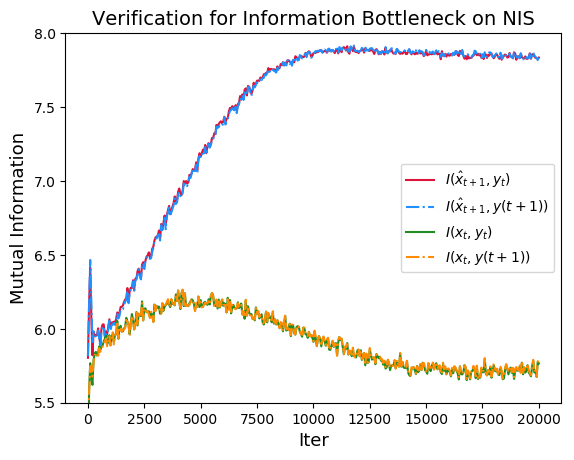

In [30]:
Ts=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900, 950, 1000, 1050, 1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700, 1750, 1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450, 2500, 2550, 2600, 2650, 2700, 2750, 2800, 2850, 2900, 2950, 3000, 3050, 3100, 3150, 3200, 3250, 3300, 3350, 3400, 3450, 3500, 3550, 3600, 3650, 3700, 3750, 3800, 3850, 3900, 3950, 4000, 4050, 4100, 4150, 4200, 4250, 4300, 4350, 4400, 4450, 4500, 4550, 4600, 4650, 4700, 4750, 4800, 4850, 4900, 4950, 5000, 5050, 5100, 5150, 5200, 5250, 5300, 5350, 5400, 5450, 5500, 5550, 5600, 5650, 5700, 5750, 5800, 5850, 5900, 5950, 6000, 6050, 6100, 6150, 6200, 6250, 6300, 6350, 6400, 6450, 6500, 6550, 6600, 6650, 6700, 6750, 6800, 6850, 6900, 6950, 7000, 7050, 7100, 7150, 7200, 7250, 7300, 7350, 7400, 7450, 7500, 7550, 7600, 7650, 7700, 7750, 7800, 7850, 7900, 7950, 8000, 8050, 8100, 8150, 8200, 8250, 8300, 8350, 8400, 8450, 8500, 8550, 8600, 8650, 8700, 8750, 8800, 8850, 8900, 8950, 9000, 9050, 9100, 9150, 9200, 9250, 9300, 9350, 9400, 9450, 9500, 9550, 9600, 9650, 9700, 9750, 9800, 9850, 9900, 9950, 10000, 10050, 10100, 10150, 10200, 10250, 10300, 10350, 10400, 10450, 10500, 10550, 10600, 10650, 10700, 10750, 10800, 10850, 10900, 10950, 11000, 11050, 11100, 11150, 11200, 11250, 11300, 11350, 11400, 11450, 11500, 11550, 11600, 11650, 11700, 11750, 11800, 11850, 11900, 11950, 12000, 12050, 12100, 12150, 12200, 12250, 12300, 12350, 12400, 12450, 12500, 12550, 12600, 12650, 12700, 12750, 12800, 12850, 12900, 12950, 13000, 13050, 13100, 13150, 13200, 13250, 13300, 13350, 13400, 13450, 13500, 13550, 13600, 13650, 13700, 13750, 13800, 13850, 13900, 13950, 14000, 14050, 14100, 14150, 14200, 14250, 14300, 14350, 14400, 14450, 14500, 14550, 14600, 14650, 14700, 14750, 14800, 14850, 14900, 14950, 15000, 15050, 15100, 15150, 15200, 15250, 15300, 15350, 15400, 15450, 15500, 15550, 15600, 15650, 15700, 15750, 15800, 15850, 15900, 15950, 16000, 16050, 16100, 16150, 16200, 16250, 16300, 16350, 16400, 16450, 16500, 16550, 16600, 16650, 16700, 16750, 16800, 16850, 16900, 16950, 17000, 17050, 17100, 17150, 17200, 17250, 17300, 17350, 17400, 17450, 17500, 17550, 17600, 17650, 17700, 17750, 17800, 17850, 17900, 17950, 18000, 18050, 18100, 18150, 18200, 18250, 18300, 18350, 18400, 18450, 18500, 18550, 18600, 18650, 18700, 18750, 18800, 18850, 18900, 18950, 19000, 19050, 19100, 19150, 19200, 19250, 19300, 19350, 19400, 19450, 19500, 19550, 19600, 19650, 19700, 19750, 19800, 19850, 19900, 19950, 20000] 
Islt=[5.8035965630745485, 6.169254953554797, 6.414299906366566, 6.075052772247379, 5.8209568097565825, 5.98083770160618, 5.952911482093335, 5.9569547892478205, 5.956725313913234, 6.002855704430079, 5.945844242257223, 5.894852827268872, 6.003437070012945, 6.029005306546045, 6.0302312018178545, 5.952558615237452, 5.981872683967897, 5.963651163648976, 6.014957849372543, 6.064434675438953, 6.011922007152423, 6.042754943313722, 6.040112946069944, 6.048229907183416, 6.0405440524502385, 6.066634901267378, 6.110568807569852, 6.100579573079336, 6.11066092685864, 6.147229073992391, 6.149154413656936, 6.15698311534933, 6.181760738185878, 6.1977017216740595, 6.203762123546223, 6.275745550683197, 6.185167360145852, 6.253691711871438, 6.277255351020003, 6.276304307445252, 6.3288009913440115, 6.259145980804461, 6.338713664969586, 6.339653977123247, 6.3907501059580705, 6.407107826392594, 6.367785893245031, 6.339174040081515, 6.433956434438572, 6.450898778711255, 6.422788348338222, 6.461228707669697, 6.488027004051056, 6.497298446259049, 6.516963257858296, 6.482043662224322, 6.492095033327754, 6.54127072519239, 6.5554431440487395, 6.597863340223012, 6.618563842971492, 6.623198308062736, 6.633055923770092, 6.665138943798471, 6.608631955394752, 6.708761906613294, 6.675612234948892, 6.716532425598932, 6.766079626644557, 6.7029523614885225, 6.768813166870275, 6.803145708889834, 6.831921776103541, 6.774523130093561, 6.80246025094275, 6.827008058601896, 6.851009394612532, 6.895437030755873, 6.859299696934084, 6.871145863225766, 6.927567607018711, 6.948842802227188, 6.915354238401371, 6.904251111422238, 6.934265226175821, 6.999894261739049, 6.983447483377566, 6.999482966072362, 6.982511378769773, 6.9898031323580865, 7.040805821293383, 7.035829496232181, 7.054274088570675, 7.080431090799367, 7.068372172068836, 7.07817680410131, 7.125857807935023, 7.071367762353524, 7.152428623632118, 7.187548393012522, 7.16443329341216, 7.1876480176567314, 7.2116443387939615, 7.202085886360685, 7.243289928818432, 7.187966776316707, 7.232638121035728, 7.2562517215309885, 7.238494124906949, 7.246862089755039, 7.290742795736834, 7.289010118938696, 7.321580139014418, 7.317412189084238, 7.37945084166029, 7.365400384036194, 7.384506210352787, 7.396569589442016, 7.403804592934894, 7.390643111522694, 7.400860363518522, 7.434516888533237, 7.401790452629132, 7.4206023529540435, 7.423380775244698, 7.471020444478038, 7.4937732482199415, 7.488216961473756, 7.506231766823017, 7.495983228303986, 7.483342319474165, 7.512837837629336, 7.472025274607957, 7.519470989405915, 7.529564754255125, 7.574571593555475, 7.549866799573895, 7.585749364824044, 7.5556294146343985, 7.616978564569231, 7.626435191153989, 7.57878925061367, 7.643071585768984, 7.635088290728061, 7.61513758304776, 7.5893410279007485, 7.613384833693689, 7.6644353159403495, 7.642192226641202, 7.659048608480648, 7.678482824850671, 7.678581987114705, 7.676548614226586, 7.699878185274922, 7.695550240274151, 7.699376729044078, 7.721712739766413, 7.723728505337432, 7.730924841632259, 7.729819520082035, 7.763572738954032, 7.747648774250412, 7.757125906673775, 7.757492185309836, 7.750546655198344, 7.756074732227635, 7.751299291938159, 7.745623312244192, 7.774873866121594, 7.760459698244352, 7.763413652560316, 7.7911866250482165, 7.782146969197998, 7.803538946679332, 7.791855979338293, 7.793796695621831, 7.788002495084235, 7.814466216618001, 7.81655295593107, 7.805682327266235, 7.8042538926308715, 7.792834378475149, 7.816533402921359, 7.802729434461945, 7.8434970193277, 7.837448577618575, 7.827569551576679, 7.8190834132468785, 7.844573315628045, 7.8465575938073, 7.84080456108274, 7.837287133173524, 7.8414177064751165, 7.866434725481771, 7.845483587499083, 7.869429462687679, 7.8773843228436915, 7.868576440619852, 7.841084512620435, 7.8446007955335855, 7.864031951241052, 7.866928791283471, 7.865807840136623, 7.875907225875601, 7.871812199497274, 7.879906749173118, 7.885047209003334, 7.883224375269132, 7.869325268045836, 7.8747473969078445, 7.880312077779845, 7.878525883919696, 7.867516746762436, 7.884175866998479, 7.886920995062392, 7.877540042308423, 7.882821336654534, 7.886460706644585, 7.876175779497932, 7.864995465429073, 7.885449102621866, 7.892844059702488, 7.863010042253755, 7.88494244186346, 7.891135725574705, 7.8707353306988965, 7.900279664143386, 7.905047427754705, 7.898988108582972, 7.882555125069608, 7.911707869860142, 7.870154817694348, 7.860828824751458, 7.9071530755167645, 7.8978162051112655, 7.877881823633586, 7.909892478600357, 7.874551602580866, 7.871264318880555, 7.880796411115, 7.864647959123589, 7.877695761773153, 7.880462644762288, 7.890023934396368, 7.8866393260306005, 7.867880855510852, 7.897196762240534, 7.889260222021549, 7.885342617987898, 7.881625960763512, 7.879708664854013, 7.88755303288983, 7.884355058882527, 7.8753364973828734, 7.858771266824096, 7.886100032884364, 7.891293735031564, 7.878403941838859, 7.856562569416258, 7.869855973721592, 7.86008171481957, 7.8774782125209555, 7.873500496193933, 7.855511463029325, 7.902210127507623, 7.868040582461807, 7.869904063556288, 7.880841065961504, 7.875135550573607, 7.891688758673712, 7.8730058578942, 7.861790048947352, 7.863398195919518, 7.859473721909481, 7.891953252764542, 7.880006363830704, 7.865742575360962, 7.859417044604303, 7.868509458350097, 7.860706882670622, 7.87029736970434, 7.880507872106822, 7.859076408275204, 7.858656194719643, 7.875843158141281, 7.889076450153245, 7.871264318880555, 7.856517914569754, 7.866833184112111, 7.86375886967974, 7.856583179345415, 7.86856785314937, 7.859904812927651, 7.86322988149808, 7.881473103788942, 7.862037368097219, 7.869036729037659, 7.860424641140797, 7.8446586178348285, 7.854640693522503, 7.883211207814393, 7.84984201501745, 7.857318266818628, 7.856136630880377, 7.861587957142022, 7.85660378927457, 7.861940043431763, 7.857783707718725, 7.861270220734206, 7.876516415827029, 7.856363340101088, 7.862743830668829, 7.8598979429512665, 7.823076587020767, 7.8780438405766695, 7.847478743140947, 7.844327141474243, 7.860292966593414, 7.841209889689465, 7.857847255000288, 7.849005595392555, 7.847576640304436, 7.858549137587641, 7.849917584757687, 7.864234615544414, 7.85275488500477, 7.861895388585259, 7.87716562859543, 7.853721834180983, 7.844847542185422, 7.879978883925163, 7.861124233736022, 7.879460200708082, 7.847644767570254, 7.827015945979639, 7.8452168034161245, 7.822994147304146, 7.84981739760207, 7.828862824631191, 7.832880563775184, 7.831944009039945, 7.842205463767285, 7.848383862529695, 7.861623452020012, 7.861103623806866, 7.850478632829145, 7.860785887399052, 7.849185932272666, 7.8568081710720294, 7.834417200538612, 7.853479667513406, 7.824234178041672, 7.8607171876352, 7.854800420473459, 7.831957748992716, 7.853625654511592, 7.847952771511524, 7.8620138956779035, 7.862975692371829, 7.841707962977391, 7.829911641025995, 7.841919214751234, 7.858228538689666, 7.853333680515221, 7.837814403861086, 7.826514437703521, 7.845045054006494, 7.820179174480316, 7.832983092968205, 7.846126502789129, 7.85476263560334, 7.851889267980236, 7.83495649368485, 7.83699973916141, 7.8652908744136365, 7.842611364872043, 7.838820855401517, 7.8294811225058565, 7.8692771782111395, 7.862154730193799, 7.8197807158499755, 7.8427676568348055, 7.843312102463331, 7.831030302180715, 7.8604492585561765, 7.83588394049685, 7.830614668609412, 7.8284832584359085, 7.842814029175406, 7.8262865834867466, 7.826361580728951, 7.841020965338873, 7.863754862193515, 7.826396503108909, 7.856078236081102, 7.856686228991192, 7.841936389692198, 7.833113622519523, 7.830058200522213, 7.826365588215175, 7.834877488956421]
Islt1=[5.815054567061563, 6.16002488302207, 6.465514336887315, 6.187052429609394, 5.910241233818582, 5.981652784547797, 5.95236109578268, 5.948826839648656, 5.940868483940329, 5.987918971377948, 5.928219474376751, 5.87782731358666, 5.982486450304063, 6.012686173890604, 6.016645292785556, 5.943200079595573, 5.962997698709317, 5.938667504128537, 6.001147388949437, 6.054369404571641, 5.987253121239549, 6.029400896969683, 6.027308308636599, 6.039348785176929, 6.0262433087124, 6.053478416121787, 6.10098682901937, 6.069179258808369, 6.087955334525145, 6.1299166918570185, 6.133163865476318, 6.1314773328853285, 6.157143450710379, 6.183874065366866, 6.194218270872225, 6.258477249595268, 6.173384414854247, 6.236787047314589, 6.263153445866728, 6.261302876457934, 6.320297563783937, 6.251460874204308, 6.3267140374889, 6.333206767928392, 6.36938455620459, 6.402522691590355, 6.356456857949516, 6.334272804497903, 6.424959659298991, 6.441836557584901, 6.403774990994876, 6.456281853865454, 6.477909492321199, 6.489793977646878, 6.4917020610954275, 6.472229144056029, 6.478141822599147, 6.519328376941444, 6.547452093994743, 6.590777248898039, 6.609062331705137, 6.611948026474595, 6.634101948159508, 6.639243669385801, 6.597460008356, 6.701240663871365, 6.66682927508582, 6.69946327054071, 6.750386702553976, 6.6734267055261025, 6.759690952873307, 6.78775609597209, 6.820166428661759, 6.7646281624789735, 6.788595086700811, 6.810254478431204, 6.835203714027488, 6.8824509412164865, 6.844062358828084, 6.855902824573349, 6.906175357149142, 6.925273877357387, 6.898878060640409, 6.890178095222416, 6.918895661453677, 6.983030976401933, 6.9755891963200245, 6.982942556411564, 6.965494286576997, 6.986507646232031, 7.028489847273958, 7.020580386841144, 7.0492957546360895, 7.081885409735813, 7.053458706451142, 7.0557757526070795, 7.1105981602586015, 7.0528948579483055, 7.142635555308428, 7.168877874518019, 7.155365652497237, 7.172578876695574, 7.199690799961188, 7.185975335910222, 7.22890861689408, 7.179018262362075, 7.224425984628256, 7.251083269308216, 7.225593204944973, 7.242753765265896, 7.275132947724467, 7.281222903777509, 7.305618131641501, 7.307403740924999, 7.367144223112648, 7.359380764285548, 7.363137232229084, 7.381085042560657, 7.382427587363493, 7.3752667663934295, 7.387636007868784, 7.430561768449995, 7.381510179575743, 7.40851029832473, 7.4179307595349036, 7.45169542324854, 7.472780077671946, 7.481125643862707, 7.492408459688953, 7.482696572544323, 7.478373664662326, 7.514096168286476, 7.459003943426295, 7.506064384184299, 7.516558247090034, 7.559347053300803, 7.552935309545037, 7.5796938169330526, 7.547983353699726, 7.589207126828213, 7.613958241105118, 7.581391878712867, 7.634333185841137, 7.637713406389818, 7.602149776590566, 7.574952496913993, 7.612437490161209, 7.64344110448684, 7.633087306015324, 7.649434154597494, 7.6670284243463325, 7.663387821283596, 7.663855656266373, 7.697477805116883, 7.68206281118121, 7.696014968554318, 7.697709614774608, 7.720071319849179, 7.714935648184323, 7.729183995221129, 7.7545438204445265, 7.737883050773595, 7.746913634731921, 7.738618798821462, 7.751955104447858, 7.745540091848434, 7.74088245604038, 7.733307162079649, 7.765271408674477, 7.744226833408075, 7.771866065551498, 7.792214206970559, 7.7874132905186535, 7.800063831579217, 7.779812286191754, 7.80234117670563, 7.781744519095363, 7.816605069265923, 7.811733111012763, 7.791985311848271, 7.807318526641973, 7.779556431616682, 7.818831498098824, 7.802640124768937, 7.8353028549942705, 7.836194234430247, 7.814435301724268, 7.8216573643991945, 7.851537754188526, 7.841022682832969, 7.828921167385189, 7.837682156815672, 7.847544580414638, 7.876044104950548, 7.837441135144158, 7.868305649050669, 7.871934141578111, 7.866312210902902, 7.833726767911901, 7.84045590978119, 7.864121260934058, 7.8679403953061895, 7.878642673518245, 7.875705758613578, 7.88086167589066, 7.8774650450662165, 7.8777736575368635, 7.886086292931593, 7.867700518630739, 7.88214922396485, 7.88891672320229, 7.882548255093223, 7.862197667546207, 7.892210876878987, 7.895215919049472, 7.881778817738082, 7.875480766886963, 7.885897368581, 7.878010635690807, 7.8709923823153085, 7.892806847330401, 7.894480831576258, 7.869077948895971, 7.905799690168883, 7.893648419437586, 7.88273030946743, 7.907604776464091, 7.901523129869105, 7.893519607380363, 7.883431047058719, 7.900825827266009, 7.880473522224897, 7.873038490282029, 7.9101415152443195, 7.897023295336809, 7.8860244631441265, 7.916334798955565, 7.879791677068667, 7.878910602597267, 7.880363602602733, 7.872785446151843, 7.87756923970806, 7.882008961946986, 7.900453131047112, 7.892829174753653, 7.871753804698001, 7.908028997505876, 7.882441770459252, 7.8869038201214305, 7.881651723174956, 7.8937909714475785, 7.898290805979875, 7.897852844985319, 7.885954045886179, 7.869292635658007, 7.8853409004938, 7.899910402912683, 7.874558472557252, 7.861271938228303, 7.874340350807022, 7.860997139172896, 7.877203413465548, 7.875832853176704, 7.859921987868614, 7.9054458863850465, 7.871633580111259, 7.862426094261014, 7.877270395735303, 7.8800853685591346, 7.909808321389638, 7.879415545861578, 7.875298712512756, 7.864916460700643, 7.861673259348804, 7.892990619198704, 7.884780997418408, 7.873916129765236, 7.87033000209217, 7.874362678230274, 7.874331763336541, 7.873964219599933, 7.882826489136823, 7.866568117523248, 7.8736413307098285, 7.878917472573653, 7.891905162929845, 7.864840890960406, 7.865009205381844, 7.87731848557, 7.8722106581276154, 7.862675130904978, 7.884248574248557, 7.859392999686955, 7.864803106090289, 7.883577034056904, 7.875104635679874, 7.877335660510964, 7.8718018945326955, 7.849503096182447, 7.85935864980503, 7.886258042341224, 7.867532204209303, 7.863786349585281, 7.8725747668760295, 7.865261677014, 7.868698382700688, 7.875515116768889, 7.857401851531315, 7.8667782243010285, 7.883527226728111, 7.864481934694282, 7.878230474935134, 7.868952571826941, 7.838615901106026, 7.864639371653108, 7.855224641515244, 7.843399694662243, 7.856751493766851, 7.8533800528558215, 7.8680651998771864, 7.860560895672437, 7.858839966587947, 7.86536816164797, 7.849544888538792, 7.866462205387311, 7.855070067046578, 7.878762898104986, 7.8746031274037565, 7.849070860168213, 7.867484114374607, 7.88050443711863, 7.859873898033918, 7.886601541160482, 7.8470058597664325, 7.843526789225369, 7.841233934606813, 7.841599760849324, 7.856828781001184, 7.8449712017603535, 7.831269033860101, 7.832102018496804, 7.849043380262673, 7.851379172233635, 7.881177694804378, 7.877668854365644, 7.853893011092582, 7.862745548162925, 7.858154686443525, 7.860703447682429, 7.833639175712991, 7.857139647432613, 7.834841421580398, 7.870441639208429, 7.859794893305488, 7.8387057832970655, 7.857349181712363, 7.869567434713415, 7.869605219583533, 7.8571791497968295, 7.839401368406065, 7.840644834131784, 7.849558628491561, 7.860368536333651, 7.8658645174418, 7.841891734845695, 7.832082553563714, 7.867736586006763, 7.825578975919072, 7.83828156225528, 7.863298581261932, 7.85690950322371, 7.845975935806687, 7.839370453512331, 7.847404318396774, 7.860330751463533, 7.840273282908952, 7.838999474787531, 7.831342886106242, 7.870353474511487, 7.869229088376445, 7.823614162672909, 7.837680439321575, 7.841491558721258, 7.829518907375976, 7.864402929965851, 7.836457583525013, 7.822614581108863, 7.841960434609546, 7.846923992547843, 7.833484601244324, 7.828604628018714, 7.832825083511346, 7.859453111980325, 7.82052954327596, 7.852050712425288, 7.870159970176637, 7.849933042204555, 7.8397929570600215, 7.831825501947302, 7.818252146104272, 7.833414183986376]
Isshat1=[4.88499994519591, 5.578050850085647, 5.767118699514605, 5.673998739634334, 5.620925340000671, 5.790139096314484, 5.83351123253686, 5.843718966555422, 5.818926931064303, 5.835394948594933, 5.88154745245743, 5.857402945516191, 5.878330703054799, 5.888491329583973, 5.914585553548282, 5.932737400221164, 5.9543910739509975, 5.895255917489389, 5.912467347869969, 5.956672166923187, 5.890817384720254, 5.93522796670509, 5.964742738207686, 5.914336989909952, 5.960918065298247, 5.961851599766534, 6.05327116946399, 5.932678816378408, 6.007394392660539, 6.0203282857751335, 5.98449856355438, 5.982525866697943, 6.002031910483826, 6.011997534062145, 6.0742212448357105, 6.0489536767748175, 6.028015684249777, 5.96369930619365, 6.0442567011163115, 6.099576206320031, 6.060160080418754, 5.995778763845687, 6.034590010665559, 6.113634684095467, 6.022714242001336, 6.102458711567592, 6.0966485152085195, 6.086099895417662, 6.184910933697309, 6.056700481601699, 6.13438178857341, 6.138617822465416, 6.112133447042338, 6.115319241465545, 6.119025382569257, 6.079871025345478, 6.108936511194534, 6.092022394050407, 6.0473000969064685, 6.163854249234293, 6.1248548981796445, 6.155427429156935, 6.140974175765389, 6.150376986663515, 6.102453938498184, 6.1050337070554965, 6.1717063933394165, 6.121561917422349, 6.149316480606961, 6.160623008200382, 6.168044831639476, 6.189296571022366, 6.16400575096545, 6.14639766892886, 6.188766291612074, 6.168039319392824, 6.173877531352809, 6.15782851458949, 6.23217305668444, 6.189004465896066, 6.2588926891307395, 6.186173688310281, 6.133319202738355, 6.242939499922701, 6.261081430549274, 6.153050255202441, 6.240932483112837, 6.1543428304900365, 6.1576083221887865, 6.154377645441968, 6.172051160269694, 6.18667246865434, 6.199738510929667, 6.192792452134875, 6.168347387369481, 6.125588605454385, 6.16838922728224, 6.147257385647256, 6.217630329489566, 6.1473450214781895, 6.194114079541155, 6.146961636512653, 6.149709012642995, 6.178103776749659, 6.182395327424456, 6.166260986829262, 6.162619688641315, 6.199975019100545, 6.164494344746954, 6.218728734402578, 6.241357969542452, 6.228680149495263, 6.161643895816141, 6.154942212779105, 6.191520232295876, 6.137200788416881, 6.197877391041044, 6.144303468474315, 6.16727288034265, 6.196720566002337, 6.155422273269641, 6.1733339361112485, 6.164749198913399, 6.11074436303697, 6.209666077857794, 6.146739793910964, 6.1948273476556235, 6.1044217108480785, 6.144034463705933, 6.161729594033951, 6.14022006825151, 6.13797031380926, 6.137965030389289, 6.179999264092022, 6.1400360972052805, 6.152430346631927, 6.17110664502348, 6.096955649469005, 6.112994421133705, 6.0679061619212815, 6.18963995991662, 6.088947383055032, 6.152220132604692, 6.1086184640691235, 6.094830363161989, 6.099551688961135, 6.067502872512193, 6.076116457897572, 6.056814526470181, 6.144582399154628, 6.103434519582127, 6.118117341419921, 6.070047644239227, 6.087310818153279, 6.098160113097065, 6.044720011135688, 6.028943697881258, 6.060337196085152, 6.116359970756849, 6.0438771220249325, 6.103804476404289, 6.074489600473675, 6.083034862427021, 6.044189988196246, 6.10853382443005, 6.034611787133306, 6.059853116319689, 6.028838925484236, 6.057322597839008, 6.031224937048278, 6.004606810697172, 6.04023597208101, 6.037126182971679, 5.983410346221545, 6.035146837931462, 6.087865020240985, 5.987945398465785, 6.004731508528154, 5.9913644783401105, 6.034689818530432, 5.950461847869, 6.021740736008157, 6.022701751085942, 5.969460580475897, 5.960517015585332, 6.011274556221348, 6.017689535171032, 6.014783941970448, 5.97901670256307, 5.964259106292989, 5.946471255270175, 6.008293566960832, 6.00360585393058, 5.962978259595653, 5.960535941226851, 5.9386994149721355, 5.978722528143038, 5.951808080690496, 5.949893487522871, 5.94201002883826, 5.911765827379532, 5.970962191231908, 5.938693396020588, 5.883312751050301, 5.931521858402056, 5.9502096827829964, 5.9314686203970926, 5.881018375838471, 5.927877468597149, 5.937862932622334, 5.9151604583170725, 5.885338144388706, 5.921583320620723, 5.93397391510952, 5.858955442051651, 5.857419217355359, 5.888038907064979, 5.916615132960885, 5.877628481301273, 5.90046029025291, 5.90327912208014, 5.82055294135902, 5.906734375542368, 5.94451770170657, 5.923850057427935, 5.930828553757262, 5.877435108826172, 5.828236932922439, 5.872266586206877, 5.865135297612102, 5.903316440773767, 5.82622379388537, 5.846321047692328, 5.846426875301565, 5.8142994503064305, 5.854790963579565, 5.815809262690628, 5.813915271640083, 5.807337088003832, 5.852853753648116, 5.858635195495751, 5.81710916740728, 5.854655826247854, 5.789722991903486, 5.822809836259951, 5.835033994237988, 5.752731204491147, 5.829215516617854, 5.769100950335764, 5.773275330725031, 5.858381727408214, 5.824719836114205, 5.791540893795234, 5.804722976062229, 5.804650502530629, 5.760638800235118, 5.829609267279698, 5.812770483758391, 5.80073333353351, 5.810005285963574, 5.784637732642506, 5.787115168365077, 5.757060736201245, 5.780305394801681, 5.731069649699502, 5.738801264606316, 5.784962141723947, 5.773112808297812, 5.720412546015766, 5.749214961952199, 5.753757344857842, 5.753159867293014, 5.775912335793093, 5.731880727966019, 5.7720752134996385, 5.758225731044491, 5.743951136246086, 5.834639241102112, 5.743731585413572, 5.776710045105696, 5.73888878195837, 5.735070538501586, 5.734105528474121, 5.780884774406281, 5.703838093259827, 5.686895274595959, 5.680397760693949, 5.726008115953204, 5.736312369638992, 5.738477413656588, 5.718396721742955, 5.6940783017963215, 5.74852762546864, 5.707387462273927, 5.719426081069771, 5.7603493481299575, 5.722001170671608, 5.771160220901733, 5.762087126945902, 5.719582567480232, 5.712402646289963, 5.696040218264458, 5.761060176143986, 5.738964203711745, 5.7134801823878325, 5.748701125614146, 5.766672584265713, 5.725420010209371, 5.749627026110728, 5.767324577748989, 5.725767674975284, 5.740323845037467, 5.744794076215656, 5.704990819798225, 5.693959799534849, 5.756153690657539, 5.716264605412804, 5.73013709766752, 5.692026989441201, 5.719611126987223, 5.7192074728465006, 5.705966102391676, 5.678774094114074, 5.721557102770538, 5.699960239156121, 5.73381349903686, 5.735324151177141, 5.7150298923945675, 5.699701781497141, 5.657755783225789, 5.746429173593316, 5.695340315490412, 5.6913528915108165, 5.702373557863177, 5.754157540694356, 5.73635030009035, 5.65277937383143, 5.70892209315784, 5.689502927095858, 5.658089780071204, 5.7109473937283415, 5.714190564530751, 5.735734814076635, 5.724150718596295, 5.666348538570568, 5.745885476641185, 5.659911151814438, 5.679450473974559, 5.6691921460385455, 5.726821255853262, 5.706599187233662, 5.7061600286139775, 5.7964288795926615, 5.696624828298388, 5.685004246550284, 5.717908587612011, 5.691280236992492, 5.739095402781589, 5.669327314053418, 5.716685844305243, 5.753117576758159, 5.715767698787817, 5.712113722837886, 5.7178197444973256, 5.69066183217448, 5.687124858069395, 5.733244023949929, 5.708245213309915, 5.658719806129108, 5.663650852730416, 5.724283151712278, 5.755979097318811, 5.72812910295126, 5.691676338564484, 5.726084381022638, 5.737460363204557, 5.702184494409321, 5.73139046846825, 5.6613143120571845, 5.711387506559964, 5.730017543052735, 5.717144153803504, 5.717787294792296, 5.744198767864611, 5.705929617037659, 5.770963594416712, 5.692110899087965, 5.7390498324710135, 5.703536223820922, 5.71968537568595, 5.753585893840027, 5.704823851322056, 5.693083714033164, 5.6787966978326745, 5.745613966065528, 5.781610934376759, 5.705016127129141, 5.711745308326015, 5.674984519651091, 5.775297499460051, 5.765413592301159]
Isshat=[4.86506927232157, 5.567099783577451, 5.748299819006457, 5.713879075857055, 5.6783703925162525, 5.775852320488409, 5.823249759640363, 5.821773752561335, 5.806157264549589, 5.815215724485229, 5.87017267773748, 5.844578466931948, 5.857348507020894, 5.881652448852078, 5.907027294850153, 5.913869759856289, 5.93363979042105, 5.88198854791658, 5.900925979646344, 5.948996378455922, 5.886766199275431, 5.932530373988896, 5.975815899894874, 5.8938582246323294, 5.956803957770638, 5.966460135978235, 6.048957065747717, 5.935305087699295, 5.998843699129627, 6.012851142683145, 5.978681252419102, 5.993016701910625, 5.994620209922694, 6.007391545658055, 6.073233630274049, 6.0465583020215075, 6.027967127963819, 5.951551672327537, 6.033509941300919, 6.087181114394364, 6.056869190474057, 5.996824971402726, 6.023064783630324, 6.109697212381777, 6.0233901803344105, 6.101429117684787, 6.100055880104606, 6.093682263296899, 6.173902425743435, 6.057691191966341, 6.125327079810152, 6.123475739246511, 6.115489006038766, 6.117508477459465, 6.098595337900262, 6.072091387564597, 6.115525341334303, 6.100741935899439, 6.046315903166791, 6.161675877681452, 6.1201787515316495, 6.152454208801234, 6.143305732072088, 6.143152725630354, 6.126903442631258, 6.101609123935298, 6.1737730638029955, 6.1259320662947525, 6.155506969651753, 6.163543057256503, 6.182456082810056, 6.200016111314069, 6.164608974545625, 6.147003210034227, 6.201937938997647, 6.174830661663009, 6.1677966966817985, 6.1608508478431645, 6.227153166975728, 6.189748966886039, 6.2585621589740885, 6.1833183549639354, 6.139780422334131, 6.236070804666867, 6.265312858536459, 6.154035190849121, 6.240296192252875, 6.153837695503198, 6.154663292698199, 6.158237834873021, 6.1599893061866045, 6.1789260814890445, 6.200506706300435, 6.197510007659712, 6.165154015347482, 6.119189479893308, 6.175046655582621, 6.147431501701388, 6.21845342501716, 6.158832699832734, 6.1812686601552365, 6.144799283954403, 6.1493056815646145, 6.162576073981834, 6.177188179549547, 6.170192362036109, 6.173093258670697, 6.186742936123359, 6.166505199124484, 6.217436889649979, 6.242278567278602, 6.225307804990798, 6.144875058849618, 6.155999317873603, 6.197901321467775, 6.149234967317204, 6.200903929609135, 6.149003333367688, 6.167399215062557, 6.210329827185486, 6.165213674248808, 6.160499511398771, 6.161394571822558, 6.112060127167786, 6.200831104777229, 6.128466450608664, 6.191113410406176, 6.114393428001552, 6.16012142002771, 6.1630866196571095, 6.13937182089138, 6.13208652975026, 6.147071792854717, 6.174697928312027, 6.146892931951041, 6.143156126095155, 6.161780106285792, 6.096469638900206, 6.118878442609106, 6.07687749669705, 6.196351465679446, 6.090191558101684, 6.1359842255697625, 6.097866598986531, 6.089929666322027, 6.103749155605064, 6.069422551479352, 6.073859766439062, 6.062290253483461, 6.141164386443638, 6.105684934180959, 6.120321611898383, 6.079657720854227, 6.092171041884469, 6.093942378307941, 6.036766159064883, 6.039663027672745, 6.067033383026654, 6.114713282141999, 6.050440511430199, 6.108338884990563, 6.084428545354737, 6.086818054128737, 6.047369843693834, 6.11873423503793, 6.030199554882215, 6.066943214589272, 6.033008087846494, 6.068722658556188, 6.031046238373357, 6.003665628688908, 6.045608238734762, 6.039571237343447, 5.984731491844066, 6.043937015252395, 6.097339100251781, 5.996527886379955, 6.008377005519854, 5.992286956709131, 6.031931487676447, 5.957166043663862, 6.02896378540566, 6.027017738868565, 5.969209984492675, 5.962039836545859, 6.010837006207323, 6.023382719659871, 6.013388942725422, 5.9867188079377875, 5.963551903692219, 5.958985249124445, 6.00644985294465, 6.008621780931057, 5.968581336767587, 5.965783270953316, 5.95097542662903, 5.977247506846314, 5.949297496757517, 5.958919836450483, 5.955664918858733, 5.91510660737003, 5.987658796173354, 5.948174154070556, 5.88402751364723, 5.933887543110388, 5.950448538321743, 5.923944225575924, 5.883171498713984, 5.929445597737968, 5.94839980021869, 5.906873760723599, 5.890262014086726, 5.928230593490738, 5.939596250873842, 5.858484579603568, 5.858577833181821, 5.893976117153964, 5.919767147940875, 5.880690038036095, 5.895016982796455, 5.912667416841814, 5.817700104474671, 5.927374545298828, 5.943719984439662, 5.931471855555342, 5.934285898379194, 5.880454012912888, 5.8289312527295, 5.879968103826061, 5.875243636364268, 5.910172700583186, 5.827212508808645, 5.852990409720088, 5.850448093898359, 5.812482650539308, 5.872153143703207, 5.822306518846004, 5.806141824069825, 5.804675217038128, 5.856740863925318, 5.859724064604322, 5.813579811098365, 5.858446543906043, 5.794279421189471, 5.822432996149989, 5.835529738377255, 5.758964453939952, 5.832163808489513, 5.7718962512560035, 5.777068282522612, 5.87033247352256, 5.826426783160545, 5.79654069592703, 5.80532411656464, 5.808645065338148, 5.768307556629629, 5.827805143242744, 5.8113864399269834, 5.80998293153233, 5.811134141358071, 5.792025234309872, 5.79436775286896, 5.767264672206712, 5.7840582253714174, 5.735012723939675, 5.743810556629044, 5.791679390677927, 5.772266019875896, 5.737727373212625, 5.75041513372058, 5.749118998137172, 5.756058969512245, 5.789370162736712, 5.732201155035831, 5.7889356818171205, 5.766812471371146, 5.745662646382266, 5.8353730312615095, 5.746183117666663, 5.785149150363022, 5.746039147631279, 5.741863345301973, 5.738423503307164, 5.784010461756054, 5.705845134835927, 5.689002950972348, 5.68453120881991, 5.73971567580597, 5.735777040861973, 5.741975403727761, 5.727176457485466, 5.698435712490335, 5.747420295073454, 5.719705318478102, 5.722234174165838, 5.770596518289614, 5.722517714857918, 5.767481795255716, 5.768104730206822, 5.736218223443286, 5.7139362514574445, 5.702403264375527, 5.769053318611243, 5.746199573984561, 5.720624084278763, 5.75286322173568, 5.771567834687449, 5.724516547174632, 5.759200341851917, 5.77283186672148, 5.727228273818179, 5.7452296538951675, 5.75376345144725, 5.714155642258223, 5.704616327499901, 5.771430718219934, 5.72509436017722, 5.745394711086715, 5.695130132785979, 5.72939288689214, 5.731656838906102, 5.718239218337211, 5.684397755563558, 5.735740967640574, 5.707488502624577, 5.747633831533615, 5.738310516461113, 5.7214739509375505, 5.711520483407729, 5.664992900429168, 5.7438051208175835, 5.702050933008718, 5.696640361369178, 5.708523391025917, 5.751910589240471, 5.743697456059081, 5.660874693514389, 5.718448283033306, 5.699864548879744, 5.664406176954095, 5.718860845327453, 5.7205514469065495, 5.748829310457751, 5.727224249521739, 5.666940963967832, 5.75120057188338, 5.665984486052435, 5.689101100729016, 5.674146338186596, 5.738027001365377, 5.708731719407168, 5.7206157711978145, 5.801380907316842, 5.702964927073226, 5.685426741352577, 5.722961799306238, 5.70979606262684, 5.746093576007961, 5.676381701116221, 5.72463219566016, 5.765830732930006, 5.725993124650321, 5.717334735733003, 5.730771494799851, 5.6851290375157895, 5.702139239576586, 5.7434142212484405, 5.717271084669724, 5.663850674858627, 5.67685462354468, 5.730767439510224, 5.761641345217135, 5.731562265665228, 5.706583465368366, 5.730476609666901, 5.745385121421984, 5.706914802538311, 5.7362893102089165, 5.673327165160583, 5.728548876445321, 5.741336307698478, 5.723265075138461, 5.719604441646886, 5.760386385855517, 5.701992753809805, 5.782592439811755, 5.701053923493347, 5.737983135773759, 5.718507292421257, 5.723712801557549, 5.762893697980845, 5.719176192461081, 5.702508676144958, 5.6858577926290845, 5.748596878334471, 5.7901070944122335, 5.709731762529481, 5.7186422446705905, 5.677001819711947, 5.780492554757338, 5.772311234254196]
plt.plot(Ts,Islt,label='$I(\hat{x}_{t+1},y_t)$',color='crimson')
plt.plot(Ts,Islt1,label='$I(\hat{x}_{t+1},y(t+1))$',color='dodgerblue',linestyle='-.')
plt.plot(Ts,Isshat1,label='$I(x_t,y_t)$',color='forestgreen')
plt.plot(Ts,Isshat,label='$I(x_t,y(t+1))$',color='darkorange',linestyle='-.')
plt.legend(loc='best')
plt.title('Verification for Information Bottleneck on NIS',fontsize=14) 
plt.xlabel('Iter',fontsize=13)
plt.ylabel('Mutual Information',fontsize=13)
plt.ylim(5.5,8)
plt.savefig('Spring_Scale_and_I_yt+1.svg', dpi=600, format='svg')
plt.show()

[(68, 1, 84), (59, 81, 138), (33, 142, 140), (87, 198, 101)]
['#440154', '#3B518A', '#218E8C', '#57C665']


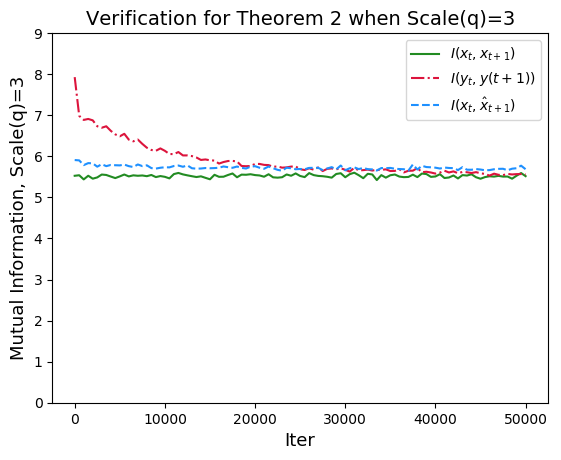

In [31]:
rgb_list,hex_list = generate_colors(4,'viridis')
print(rgb_list)
print(hex_list)

Ts=[500*t for t in range(101)]

Isst=[5.526092059117028, 5.539135758381743, 5.437947769955104, 5.5269449708181195, 5.455708535720167, 5.486244312935207, 5.5563058365414815, 5.545865216296655, 5.5074311528494775, 5.470022252190435, 5.511223615430054, 5.557141409677121, 5.510928173748399, 5.537069057942422, 5.526484281769127, 5.533598795921915, 5.516541717813059, 5.545841870804823, 5.494554820728586, 5.51936645135453, 5.50068880028992, 5.462886614028471, 5.567806780829002, 5.595153934139874, 5.5601021464492595, 5.536660559721961, 5.515415957891277, 5.495773738949519, 5.5128046444654455, 5.476293051172348, 5.4408645722765225, 5.549996460117994, 5.500952680108655, 5.5032561062978145, 5.545482637302518, 5.582282489956918, 5.489995112081232, 5.55430542311486, 5.5508748180270295, 5.563539291756849, 5.5431973843790345, 5.533914972356527, 5.503204009571137, 5.563487959696741, 5.488507789397249, 5.48046243864011, 5.4909125507337615, 5.5579776288404865, 5.526938476975602, 5.583425042583189, 5.521653781327547, 5.494126456139519, 5.591365307311616, 5.542550876396247, 5.5230707455504335, 5.515530394747349, 5.501905498058901, 5.4805554668987035, 5.570023207440619, 5.588157746757338, 5.491194012062059, 5.565949349545642, 5.601229837590105, 5.539473164312785, 5.467470098950566, 5.574441165493531, 5.558074786317557, 5.42198861863692, 5.542124315087734, 5.48098957826939, 5.539133302997183, 5.557087049103808, 5.506899164374663, 5.492861856910857, 5.497818870470241, 5.5528866964336165, 5.494206018270786, 5.579986525129714, 5.568273373533498, 5.49965199550437, 5.509389242546481, 5.564622661576959, 5.471933889472991, 5.484373203814245, 5.5331723559056805, 5.461214665110684, 5.542694616471321, 5.531703148940181, 5.562725459336899, 5.490915816459071, 5.454394013120763, 5.494540022307587, 5.514128203372878, 5.506222169419315, 5.524074931218839, 5.506456719845559, 5.508003624972834, 5.4553281391307085, 5.528332363682452, 5.592737862091164, 5.517084284088035] 
Isshat=[5.909278352111667, 5.901045408550799, 5.785781331709529, 5.834526451820507, 5.828402324390013, 5.74777551471108, 5.808259299270318, 5.760879603950675, 5.790085359172666, 5.783159827266043, 5.7791048805633265, 5.799583442993852, 5.760408058257884, 5.7396422183547395, 5.801791876762289, 5.761641604104957, 5.780948404292913, 5.713492616484844, 5.700948358371045, 5.72168776865428, 5.733782980824646, 5.730550999852251, 5.764140756980603, 5.775748455684848, 5.745671880265979, 5.7788275695963955, 5.709365432924786, 5.699119079597074, 5.703102317441752, 5.715181629406091, 5.709506744984811, 5.713527474739592, 5.7223648224652415, 5.7531273509794865, 5.735089320341126, 5.720910631032656, 5.751345972486828, 5.718884380780128, 5.703286691063568, 5.74732733327354, 5.7593734635318885, 5.722155701937451, 5.696736313326067, 5.752533850581921, 5.710611816481609, 5.671158648613354, 5.649014105667006, 5.723996549485726, 5.708197724510754, 5.685679152409603, 5.691572450132066, 5.685028564486332, 5.717753562436393, 5.719413747580593, 5.71989030838503, 5.66423029569465, 5.70359554206586, 5.736626512530408, 5.681470735350885, 5.77574609804106, 5.660139644291015, 5.710032427365564, 5.7314212502169815, 5.68911479586524, 5.718036693213031, 5.6863343983549095, 5.6813750389923365, 5.654203686133299, 5.714424128076593, 5.710844258258604, 5.717698293431623, 5.698231907285696, 5.689876174544064, 5.685510673726376, 5.65131723160481, 5.801452675201444, 5.678212363115216, 5.769371808309991, 5.7387227213113245, 5.7324598009011485, 5.723597900521181, 5.702740285923182, 5.727043965040922, 5.716256481512391, 5.712109030678143, 5.6650915204236565, 5.735689981947138, 5.6739139452768015, 5.673149084529647, 5.690051979354541, 5.678272950000452, 5.660532022614817, 5.664492310976364, 5.684995554532872, 5.694471687558326, 5.696857006671055, 5.659851754309928, 5.698460524538135, 5.710538345103862, 5.772380615393327, 5.685421073272152] 
Irrt=[7.928297717834302, 6.986082427818884, 6.886377617180688, 6.9099018646133255, 6.876458725838982, 6.732605409358068, 6.696035541660798, 6.73171005532825, 6.621300148170947, 6.534610963677652, 6.486639397312736, 6.548513225110064, 6.406309951654831, 6.364773433839048, 6.408245588208333, 6.302749474144471, 6.209536407623578, 6.155094163299924, 6.134955729662207, 6.192475457807982, 6.133938312457985, 6.0561487521446535, 6.053496590600126, 6.104203647790268, 6.022004896624166, 6.022156182436774, 6.005334702494421, 5.970988826700804, 5.912012945416892, 5.9238687669519905, 5.903132479007117, 5.89630143341686, 5.822991991093395, 5.8608685289377584, 5.885621146086757, 5.888462917247175, 5.875113985633784, 5.764810943232393, 5.759008272560172, 5.764296630349356, 5.814334232274726, 5.814704012450384, 5.7917218179822925, 5.786189425629932, 5.746838624327999, 5.752679336177563, 5.723824920821132, 5.7308008997514515, 5.750022136242271, 5.753540118269214, 5.684717022290163, 5.667160527435917, 5.709302074367786, 5.6733766829231875, 5.728518496770709, 5.641369408135561, 5.695077240375851, 5.705542507641057, 5.683518877943826, 5.709932938511975, 5.67093574215072, 5.628386535875695, 5.71926712584984, 5.656081407300522, 5.663918967148762, 5.677027463494553, 5.654161555725208, 5.669938038416363, 5.670489947357714, 5.682830860692335, 5.642042447410427, 5.645222531864217, 5.68349795107611, 5.60863168589897, 5.647923221828483, 5.6506732767125785, 5.714289918187918, 5.613510493374438, 5.624198921336327, 5.606103423108462, 5.579366261993099, 5.603805699514136, 5.650373737523997, 5.606703709902331, 5.633290666628525, 5.589026809999209, 5.619363111537756, 5.612384704956179, 5.593495993592297, 5.614759410313049, 5.587360591576937, 5.5704130716428715, 5.529839272135839, 5.577455052920928, 5.5496354908076375, 5.542823035681405, 5.571211648430956, 5.558321853211474, 5.566614173536849, 5.567993823445214, 5.557277375044988] 
errs=[1.0537690533970216, 0.6148114970607652, 0.6173644153990963, 0.5928845133929384, 0.6014661700520649, 0.5366257203395146, 0.4888320553074981, 0.5158564544606148, 0.47275969518704264, 0.44672674670124995, 0.4114745046978443, 0.4219652479758908, 0.37729122216068206, 0.35228136730787374, 0.36834213828404677, 0.3225581799704986, 0.28554824705386195, 0.2569710434588721, 0.266890325972349, 0.28198713490381094, 0.2615046485872853, 0.24258288028320704, 0.19949057899132783, 0.21072066960805783, 0.18978063730340064, 0.19820294710601605, 0.20144880345164007, 0.19467690229362586, 0.16303514357670984, 0.18286063167320118, 0.18954658161758084, 0.14145114871111966, 0.13451909474890283, 0.14978890523111144, 0.13916605986821096, 0.12518341395704632, 0.16053360329416574, 0.09037456404986066, 0.08797335997201298, 0.09090257926088556, 0.11703179700193359, 0.11682952779764492, 0.12005532264653128, 0.09801756618142832, 0.11420128464438363, 0.11407244593971211, 0.09709155580404547, 0.07991416517677906, 0.09682201039106336, 0.06992071115791235, 0.07853447328857645, 0.08609017981725177, 0.057691227628663855, 0.07491868049148359, 0.0948807230337641, 0.06537901295288813, 0.09313476337781687, 0.11409438795862385, 0.053026213211919006, 0.07771025874749599, 0.08230449691609468, 0.058995656288362106, 0.05871809117453159, 0.06418835563007397, 0.10765402621928902, 0.05069589412940658, 0.05289002556289565, 0.11335799838617364, 0.0731020392932651, 0.10239239752935703, 0.07318132339902976, 0.058213904596344686, 0.0847928190418422, 0.07918094516410042, 0.07157325887201067, 0.10224246133150916, 0.09637706500209667, 0.08251827503016575, 0.07094312887850243, 0.09515911522958788, 0.08918451407332105, 0.058118500597160845, 0.10687492888431076, 0.09471384796277961, 0.07322290491072068, 0.08412131232483183, 0.07934258350143315, 0.05823255245640453, 0.0465293428028007, 0.0820984626086045, 0.09193412271769363, 0.06784908834703499, 0.06748468419332478, 0.07348394110572196, 0.07503030548215925, 0.08253029233058354, 0.06228088433584377, 0.0996437594496054, 0.07844225320629047, 0.09107856619750213, 0.07178174214537496]

plt.plot(Ts,Isst,label='$I(x_t,x_{t+1})$',color='forestgreen')
plt.plot(Ts,Irrt,label='$I(y_t,y(t+1))$',color='crimson',linestyle='-.')
plt.plot(Ts,Isshat,label='$I(x_t,\hat{x}_{t+1})$',color='dodgerblue',linestyle='--')
#plt.plot(Ts,errs,label='error',color=hex_list[3])
plt.ylim(0,9)

plt.title('Verification for Theorem 2 when Scale(q)=3',fontsize=14)
plt.legend(loc='best')
plt.xlabel('Iter',fontsize=13)
plt.ylabel('Mutual Information, Scale(q)=3',fontsize=13)
plt.savefig('Spring_Mutual_Information_Scale3.svg', dpi=600, format='svg')
plt.show()

[(68, 1, 84), (59, 81, 138), (33, 142, 140), (87, 198, 101)]
['#440154', '#3B518A', '#218E8C', '#57C665']


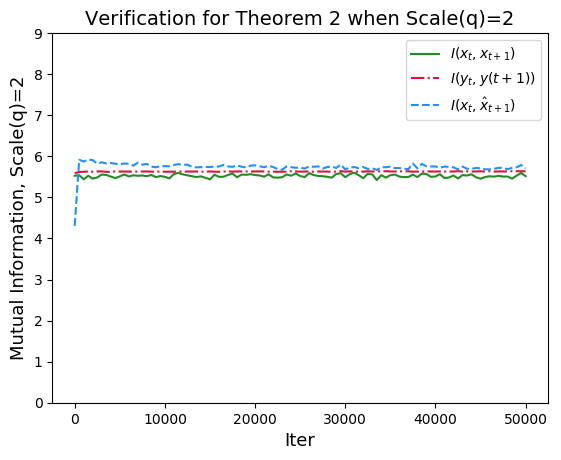

In [32]:
rgb_list,hex_list = generate_colors(4,'viridis')
print(rgb_list)
print(hex_list)

Ts=[500*t for t in range(101)]
Isst=[5.526092059117028, 5.539135758381743, 5.437947769955104, 5.5269449708181195, 5.455708535720167, 5.486244312935207, 5.5563058365414815, 5.545865216296655, 5.5074311528494775, 5.470022252190435, 5.511223615430054, 5.557141409677121, 5.510928173748399, 5.537069057942422, 5.526484281769127, 5.533598795921915, 5.516541717813059, 5.545841870804823, 5.494554820728586, 5.51936645135453, 5.50068880028992, 5.462886614028471, 5.567806780829002, 5.595153934139874, 5.5601021464492595, 5.536660559721961, 5.515415957891277, 5.495773738949519, 5.5128046444654455, 5.476293051172348, 5.4408645722765225, 5.549996460117994, 5.500952680108655, 5.5032561062978145, 5.545482637302518, 5.582282489956918, 5.489995112081232, 5.55430542311486, 5.5508748180270295, 5.563539291756849, 5.5431973843790345, 5.533914972356527, 5.503204009571137, 5.563487959696741, 5.488507789397249, 5.48046243864011, 5.4909125507337615, 5.5579776288404865, 5.526938476975602, 5.583425042583189, 5.521653781327547, 5.494126456139519, 5.591365307311616, 5.542550876396247, 5.5230707455504335, 5.515530394747349, 5.501905498058901, 5.4805554668987035, 5.570023207440619, 5.588157746757338, 5.491194012062059, 5.565949349545642, 5.601229837590105, 5.539473164312785, 5.467470098950566, 5.574441165493531, 5.558074786317557, 5.42198861863692, 5.542124315087734, 5.48098957826939, 5.539133302997183, 5.557087049103808, 5.506899164374663, 5.492861856910857, 5.497818870470241, 5.5528866964336165, 5.494206018270786, 5.579986525129714, 5.568273373533498, 5.49965199550437, 5.509389242546481, 5.564622661576959, 5.471933889472991, 5.484373203814245, 5.5331723559056805, 5.461214665110684, 5.542694616471321, 5.531703148940181, 5.562725459336899, 5.490915816459071, 5.454394013120763, 5.494540022307587, 5.514128203372878, 5.506222169419315, 5.524074931218839, 5.506456719845559, 5.508003624972834, 5.4553281391307085, 5.528332363682452, 5.592737862091164, 5.517084284088035] 
Isshat=[4.306888785618253, 5.917247039464589, 5.872444057039294, 5.919234543113277, 5.907702056805148, 5.82331215216591, 5.853674216575866, 5.827454127589394, 5.837326625885917, 5.820953049677302, 5.803701210394911, 5.825361387716446, 5.8199798880006925, 5.773648136620419, 5.84685330976457, 5.798541525967837, 5.8140057035037325, 5.748842998509417, 5.734462129384044, 5.757106103434076, 5.76031814904805, 5.75670834695915, 5.788416704546538, 5.809269625840132, 5.7936383402172495, 5.794806123283605, 5.745444093541247, 5.729602766444505, 5.736616995687264, 5.744374455627447, 5.73858325473895, 5.751329322701761, 5.752033972421379, 5.78921466222922, 5.754049945673908, 5.7447583201427905, 5.778723788835094, 5.747518529639528, 5.728553511046352, 5.774310574535325, 5.780965852755192, 5.757633597177642, 5.734523699778424, 5.771697611191743, 5.740142457010598, 5.689859406480443, 5.673471689234061, 5.755821855574461, 5.733964680235148, 5.72256573417077, 5.723556460154866, 5.70323122701673, 5.751610206633827, 5.746601180734288, 5.754381689610898, 5.702546877624604, 5.739305252896734, 5.751335634659597, 5.715850754257518, 5.800786638896406, 5.682201277142435, 5.728086773709356, 5.738374455624754, 5.711682523377965, 5.738768514803851, 5.691003431834663, 5.7087207814086725, 5.668630264766038, 5.735191459027312, 5.733282800284486, 5.749004600185951, 5.714495030170798, 5.71438435444569, 5.700625705213388, 5.686364895719719, 5.827258538547462, 5.70594036374679, 5.8149435199013855, 5.757651242092768, 5.752015526796143, 5.754159671387851, 5.721238608856253, 5.750183615878734, 5.745925519769642, 5.730831085670097, 5.68580015901439, 5.749754215828435, 5.699037462425055, 5.694359196917315, 5.717813895678183, 5.704792165697753, 5.6834595994945785, 5.683083735131096, 5.695587993597979, 5.718947542331402, 5.722693406514736, 5.6851798857690525, 5.719153955256815, 5.732904519032152, 5.789749541987282, 5.7035740993506066] 
Irrt=[5.586078026582638, 5.619558573600772, 5.623668016163161, 5.631851555757265, 5.624947865347652, 5.633010086499093, 5.631936340965097, 5.622822333551071, 5.6216936797034265, 5.631860880079281, 5.629901268978747, 5.628914939785417, 5.628991955288628, 5.627427365638862, 5.628878992578007, 5.6300307360680435, 5.631853792394053, 5.6259607321531115, 5.628943196916286, 5.629246443180963, 5.625145998972809, 5.625773798504538, 5.625290860506794, 5.632264842884585, 5.625352282507023, 5.6300183814485605, 5.6290270460237375, 5.631978475724571, 5.627126702463395, 5.624381981829428, 5.631673309620437, 5.6255126531758615, 5.6246817499928925, 5.6271633796147285, 5.634447901146106, 5.6279201956927825, 5.6311563236510045, 5.631055383565792, 5.632299288282097, 5.63005201019972, 5.631225889009967, 5.632707110298186, 5.6323656432693205, 5.626775292404946, 5.625956979414813, 5.623352813895794, 5.625943483967654, 5.626256195207595, 5.6359562320680965, 5.631694172844539, 5.626436848170455, 5.629977339997166, 5.630231780774832, 5.62418543528744, 5.630434715904182, 5.630288199878275, 5.627960104534174, 5.6245599527336925, 5.629378551240482, 5.636693503775535, 5.627563921842546, 5.632325390000156, 5.626853993793979, 5.627762816972262, 5.62795632059253, 5.634363271359521, 5.630157371394137, 5.634099212805471, 5.633255999711935, 5.63807540993447, 5.630605512420791, 5.631010731815804, 5.6326361280452995, 5.6346297309038595, 5.635051300018522, 5.626498242063851, 5.62931507553606, 5.626670179408137, 5.634913336925041, 5.6303019675805865, 5.6293174568753885, 5.6324616188069, 5.627459713147287, 5.6308050656790956, 5.629975006177437, 5.638573437012861, 5.628396744864973, 5.635690512829096, 5.62884901652388, 5.632228248505487, 5.634842974094304, 5.628763927023876, 5.637577788975965, 5.6290628014853965, 5.631204797691787, 5.631945067064184, 5.63161440477746, 5.635286678529177, 5.638009099489428, 5.6364926340218595, 5.633625344381815] 
errs=[0.5893857492340793, 0.1626360602347795, 0.17800391751479672, 0.16582637557155236, 0.1864552453248474, 0.13798945077654723, 0.1261901616714596, 0.11883175968592549, 0.13678227453890476, 0.143410837458525, 0.12010826072271094, 0.11337479787968781, 0.12733525698175605, 0.0974763778246555, 0.1335971531022887, 0.10948853597887927, 0.12245680238265544, 0.08348555508985117, 0.09817784175770392, 0.09714928231834277, 0.10602332196084997, 0.12018841762829488, 0.09344231664076598, 0.09342462331222408, 0.09838525819724475, 0.10672384650905127, 0.09391092203071799, 0.09589244354297408, 0.09137810691758474, 0.10964395132830035, 0.12314134809648908, 0.08304446687081195, 0.10250706568672395, 0.11708777632766189, 0.08545290408385205, 0.06842054833033834, 0.11788265974299292, 0.07943237889727675, 0.07262119197078896, 0.08797664383416678, 0.09815232997965921, 0.09154023810748613, 0.09465011311074777, 0.08715186231167045, 0.10287565799716254, 0.08736124003155338, 0.07733054756177334, 0.08205117713517728, 0.08455791944879729, 0.05768466159457386, 0.08244621266596586, 0.08663230075823644, 0.06824934088591787, 0.08385592315865621, 0.09451315444207108, 0.07700348853273123, 0.09698003773662775, 0.11062010301577958, 0.05987595709543962, 0.0909782162421393, 0.08032279889517295, 0.06655370902992909, 0.05953715650656019, 0.07031172119733864, 0.11137424406394851, 0.04759263304878399, 0.06151993741998214, 0.10904402745543752, 0.07886045613562342, 0.10402578503104608, 0.08591434394801108, 0.06430103804338806, 0.08533766958483252, 0.08667911153151574, 0.0795930122986004, 0.11595174477112094, 0.08753242269305474, 0.10156060243870232, 0.07843571691082833, 0.10304850941101516, 0.09993382140846113, 0.06412837214218499, 0.11385778086722255, 0.1070330287034241, 0.0806994942310658, 0.09668111461778155, 0.08494846035867101, 0.06898226852776702, 0.05373944280779481, 0.09355737681359215, 0.1054903638234191, 0.07937133531615218, 0.07138048522044065, 0.07843952903626168, 0.07968753707745214, 0.08865719940833196, 0.07419217765558288, 0.11006203163203858, 0.08358887071845855, 0.08446943031608774, 0.07692210941577367]

plt.plot(Ts,Isst,label='$I(x_t,x_{t+1})$',color='forestgreen')
plt.plot(Ts,Irrt,label='$I(y_t,y(t+1))$',color='crimson',linestyle='-.')
plt.plot(Ts,Isshat,label='$I(x_t,\hat{x}_{t+1})$',color='dodgerblue',linestyle='--')
#plt.plot(Ts,errs,label='error',color=hex_list[3])
plt.ylim(0,9)
plt.title('Verification for Theorem 2 when Scale(q)=2',fontsize=14) 
plt.legend(loc='best')
plt.xlabel('Iter',fontsize=13)
plt.ylabel('Mutual Information, Scale(q)=2',fontsize=13)
plt.savefig('Spring_Mutual_Information_Scale2.svg', dpi=600, format='svg')
plt.show()

[(0, 255, 255), (63, 192, 255), (126, 129, 255), (189, 65, 255)]
['#00FFFF', '#3FC0FF', '#7E81FF', '#BD41FF']


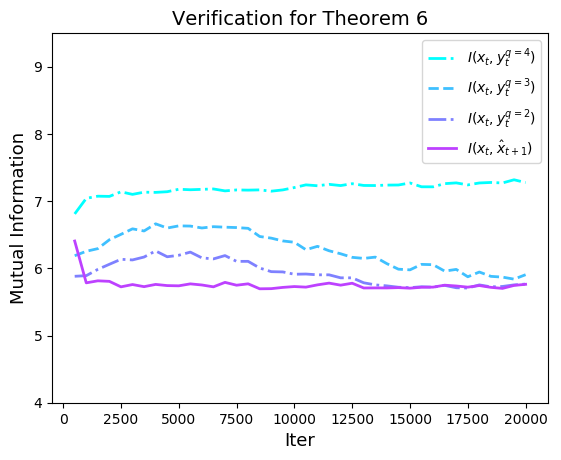

In [33]:
rgb_list,hex_list = generate_colors(4,'cool')
print(rgb_list)
print(hex_list)

Ts=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000] 
Irrt4=[6.784745025723239, 6.809657409166336, 7.041549669951651, 7.073458757441283, 7.070296942685592, 7.138397328737985, 7.100467202994364, 7.1331748461421, 7.1299624016951615, 7.139918636903479, 7.17663372780281, 7.169257159158434, 7.175088473394042, 7.180970308167119, 7.1524251955143, 7.166333343649299, 7.1635044829899135, 7.167273383565001, 7.1479243707276865, 7.166870717125561, 7.202024922755243, 7.241926220310579, 7.228578510466119, 7.249659273213025, 7.231487499076919, 7.259258642121943, 7.233135871886929, 7.231895429358679, 7.238416526392536, 7.240017027152676, 7.270120106666047, 7.213368028441095, 7.21284925929787, 7.259974410181523, 7.271365498471948, 7.241276018640716, 7.27020225309967, 7.277743802144381, 7.270351287188234, 7.3176250119275865, 7.276295547003448] 
Irrt3=[5.694933758413098, 6.18745003358026, 6.253587783923353, 6.292976609347922, 6.425109480488284, 6.5054050856185315, 6.587607961794381, 6.555755195511876, 6.662255372096006, 6.599363492062769, 6.631765347775123, 6.628723073285144, 6.600452379231482, 6.619685946141375, 6.612198554144753, 6.606458723127404, 6.595080240517209, 6.473736134860406, 6.449104061511847, 6.407641856165161, 6.387720165962526, 6.27692165257459, 6.327246304778382, 6.261235347706244, 6.216590314507556, 6.16351192078759, 6.147549815160853, 6.166805887885604, 6.0694372131386185, 5.987112174409377, 5.977336594515846, 6.058823262979644, 6.054204804762362, 5.958560314148673, 5.983911829081916, 5.874253472323985, 5.944965709075725, 5.88044558082404, 5.8692122135982485, 5.838948177077727, 5.905142969618367] 
Irrt2=[4.88499994519591, 5.88154745245743, 5.890817384720254, 5.98449856355438, 6.060160080418754, 6.13438178857341, 6.1248548981796445, 6.168044831639476, 6.2588926891307395, 6.172051160269694, 6.194114079541155, 6.241357969542452, 6.155422273269641, 6.14022006825151, 6.18963995991662, 6.103434519582127, 6.103804476404289, 6.004606810697172, 5.950461847869, 5.946471255270175, 5.911765827379532, 5.9151604583170725, 5.90327912208014, 5.903316440773767, 5.858635195495751, 5.858381727408214, 5.784637732642506, 5.753757344857842, 5.73888878195837, 5.718396721742955, 5.712402646289963, 5.725767674975284, 5.7192074728465006, 5.746429173593316, 5.710816239633716, 5.706599187233662, 5.753117576758159, 5.724283151712278, 5.730017543052735, 5.753585893840027, 5.765413592301159] 
Isshat4=[7.646369344433154, 6.406077031710675, 5.783883426084741, 5.8140132951408035, 5.806150344748769, 5.7243604501542595, 5.7585215103312075, 5.727142018910671, 5.760614680452854, 5.743080403541845, 5.739684060386799, 5.768707875100698, 5.752057099517453, 5.724640376263305, 5.790914175269888, 5.748717394672369, 5.769273410232712, 5.69537278389075, 5.697434639549122, 5.716110003882878, 5.728675760074539, 5.720186070239555, 5.753957232425742, 5.779919539586144, 5.749418732199733, 5.7782242334725495, 5.707575907693328, 5.708662677518817, 5.708174096416953, 5.712856080841102, 5.7045519008487675, 5.718180648217308, 5.7202657423912395, 5.749107874994313, 5.737072253885345, 5.719761201447117, 5.743688539479275, 5.716757762899687, 5.701366031379793, 5.745555850753399, 5.76205871041481]

plt.plot(Ts[1:41],Irrt4[1:41],label='$I(x_t,y_t^{q=4})$',linewidth=2,color=hex_list[0],linestyle='-.')
plt.plot(Ts[1:41],Irrt3[1:41],label='$I(x_t,y_t^{q=3})$',linewidth=2,color=hex_list[1],linestyle='--')
plt.plot(Ts[1:41],Irrt2[1:41],label='$I(x_t,y_t^{q=2})$',linewidth=2,color=hex_list[2],linestyle='-.')
plt.plot(Ts[1:41],Isshat4[1:41],label='$I(x_t,\hat{x}_{t+1})$',linewidth=2,color=hex_list[3])
plt.legend(loc='best')
plt.title('Verification for Theorem 6',fontsize=14) 
plt.xlabel('Iter',fontsize=13)
plt.ylabel('Mutual Information',fontsize=13)
plt.ylim(4,9.5)
plt.savefig('Spring_Scale_and_I.svg', dpi=600, format='svg')
plt.show()

## Data of Boolean Network

### Casual Emergence

[(0, 255, 255), (127, 128, 255)]
['#00FFFF', '#7F80FF']


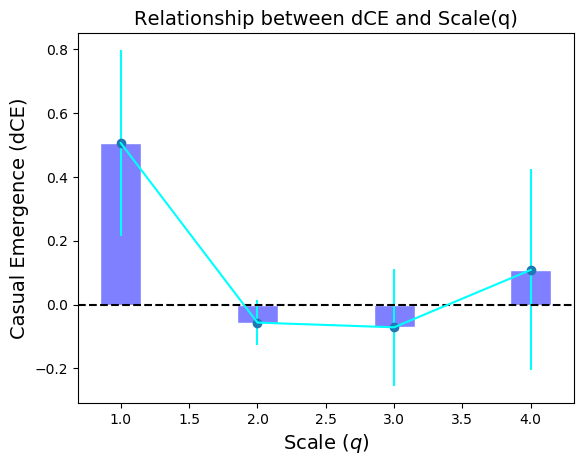

In [34]:
rgb_list,hex_list = generate_colors(2,'cool')
print(rgb_list)
print(hex_list)
#Bollean data
ces=[[-0.398,0.422,0.313, 0.097],
    [-0.275,0.210,-0.035,-0.186],
    [-0.055, 0.034, -0.045,-0.161],
    [0.812, 0.219,0.784,0.209]]

scales=torch.Tensor([4,3,2,1])
means=[]
stds=[]

for ce in ces:
    m=np.mean(ce)
    std=np.std(ce)
    means.append(m)
    stds.append(std)

plt.plot(scales, means,'o')
plt.errorbar(scales, means, stds,color=hex_list[0])
plt.bar(scales, means, width=0.3, facecolor=hex_list[1], edgecolor='white')
plt.title('Relationship between dCE and Scale(q)',fontsize=14) 
plt.xlabel('Scale ($q$)',fontsize=14)
plt.ylabel('Casual Emergence (dCE)',fontsize=14)
plt.axhline(0, color='black', linestyle='--')
plt.savefig('Boolean_casual_emergence.svg', dpi=600, format='svg')
plt.show()

### Mutual Information

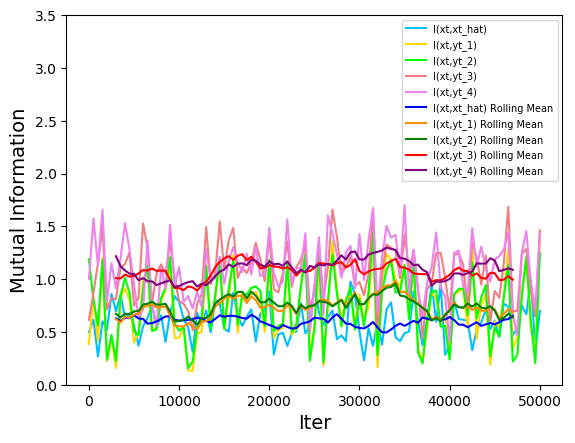

In [35]:
Isshat_1=[0.09113353276818963, 0.2712197955613004, 0.577314006955532, 0.7994076646040593, 0.677556454567255, 0.3535162848153484, 0.760134733454194, 0.6755872155804267, 0.8512957700922835, 0.6040860278216678, 0.38717832418096537, 0.6866863869329515, 0.3709028585938212, 0.5281617376026657, 0.512407710066166, 0.4610037638099404, 0.46586810592639283, 0.29832594180502886, 0.5850912314209716, 0.44798263574829167, 0.41194658831842274, 0.5641595349691366, 0.535205142820986, 0.5310292432362048, 0.4650428120447617, 0.39953594629005146, 0.4320378245777107, 0.44231943193542383, 0.6724899794212557, 0.641445362990041, 0.5459427503377756, 0.5942652757887649, 0.6306707281626933, 0.6144049772813689, 0.6012046235353484, 0.4867568368317819, 0.32404806043442974, 0.4331283978983714, 0.5823025943749653, 0.5580816631828914, 0.6086710915717134, 0.3666958377493389, 0.41919900598757215, 0.2930077146206095, 0.3510119828770839, 0.47761382937400637, 0.32554424797102466, 0.4525153792940649, 0.35235250547938407, 0.4210481860991917, 0.43623922097705903, 0.7436386775415698, 0.3392210895198361, 0.42756023501920015, 0.37769145842284296, 0.3920673785757867, 0.402997349125963, 0.3509128383151361, 0.4872993306060696, 0.4045609508066472, 0.3707502007856358, 0.38687990947491274, 0.49081787148258915, 0.32216979321693145, 0.5715037384513625, 0.2517441921119201, 0.5069074950819424, 0.4685908618972623, 0.2791219258511588, 0.5470964888655822, 0.6074831821691044, 0.41083240309461216, 0.6628387660195949, 0.2891782694317766, 0.33138466729251326, 0.4107522149122843, 0.41018509626713795, 0.46221114852327455, 0.4161911678497609, 0.3241422213751104, 0.33654021646997984, 0.5160660750834878, 0.5318852868834358, 0.5522145866774286, 0.4834536157988311, 0.3360572949721631, 0.45599634408476597, 0.39429070706626024, 0.5544503344845606, 0.3579751068909524, 0.5181091924248042, 0.28666470629447616, 0.44061202529398863, 0.6373168056271287, 0.3558065921289862, 0.24642030255499112, 0.4280042421323149, 0.6921269854182368, 0.39801894093341794, 0.27657931748027237, 0.3480587907219477] 
Isshat_2=[0.1517404603496609, 0.32535323960071844, 0.5173891462854779, 0.6487988192087815, 0.6184693001614393, 0.6782584235143756, 0.5833468472397896, 0.6296665860722771, 0.6241575916049469, 0.620733683637709, 0.44293459415272796, 0.36303576941868787, 0.3814210208400296, 0.5401612909985908, 0.6600666012348669, 0.6696443954238055, 0.6490170597873285, 0.3329322443285843, 0.6300702874022289, 0.9111146312458375, 0.5315926190119205, 0.5722153884782666, 0.48935647484444766, 0.4950262659816736, 0.6154182214706998, 0.6524605121766146, 0.4693436031174441, 0.5348174201194956, 0.7764362715099565, 0.6214842252401163, 0.44325423318219725, 0.6501646444172275, 0.8944406758773499, 0.5757515629329567, 0.6534983196610384, 0.7139431267357736, 0.8040481134798686, 0.6155377078110503, 0.6003115420788275, 0.6231441332394044, 0.6691694535794405, 0.6481920843773417, 0.682764454578666, 0.45052598105643443, 0.40420842834230275, 0.5258401836398968, 0.45387157609925144, 0.6711459040850429, 0.7303989099641996, 0.41155520793430317, 0.7162162482761637, 0.8027287463279971, 0.5566550049963779, 0.6506465378476387, 0.5519499396430537, 0.544264010599262, 0.5343196220697046, 0.442135911430748, 0.6585868118356183, 0.7316722775551571, 0.43440084119708505, 0.42251249702455973, 0.47626821302016353, 0.397676163671407, 0.49997895451794977, 0.37412932591414944, 0.5162253813105656, 0.6215034626649452, 0.4118188077884075, 0.4936100420943583, 0.5898941822911095, 0.6238329254304629, 0.6651314819859536, 0.5288297147466727, 0.3666866577073157, 0.5494473309560868, 0.7396955881431536, 0.6029017974604917, 0.6625056210146668, 0.4020451317166225, 0.43312153087799904, 0.6343280946346423, 0.5931750694091561, 0.7226569582378061, 0.579001364051082, 0.4134089130533601, 0.5209517092867318, 0.547221083715255, 0.7113060482809569, 0.556862267989471, 0.6521289123380141, 0.48440986532416375, 0.66184192550855, 0.5535422774442993, 0.45715441041350957, 0.3412493096481807, 0.6956609963822216, 0.6382711012729192, 0.6983709915497335, 0.29248964342324285, 0.42790983841681857] 
Isshat_3=[0.49870653240438995, 0.6159027376707031, 0.267636033795368, 0.6004482179565453, 0.5199508363209185, 0.8600625502183511, 0.6958030147783442, 0.8513403117647288, 0.6356855887343497, 0.676043339303294, 0.5610867876539707, 0.3684080237655447, 0.5540038953651101, 0.6329809748674512, 0.7525082671945971, 0.5422027383361206, 0.657586975541723, 0.4056456217572625, 0.6817292598086155, 0.8394568633645089, 0.7830502360648678, 0.619982451746292, 0.5458467121720562, 0.3112604818746916, 0.682533172181908, 0.5689147959774724, 0.7023337307393576, 0.4955313719714123, 0.7990814616975161, 0.7667809248501753, 0.5303313335673254, 0.5030435837961904, 0.8713666837626649, 0.6480909437458765, 0.55672741230737, 0.6457416673082668, 0.7128628426596854, 0.4091783431123706, 0.6730296550009724, 0.7068737687699901, 0.8844329914254035, 0.2866890139575525, 0.47612441387767696, 0.4921906894997334, 0.36700000216378925, 0.49137014379524163, 0.5035569538864417, 0.7727744726283631, 0.4863575248354828, 0.5543235472115197, 0.9426284606162557, 0.6850171847041094, 0.5687284671813791, 0.6394366955804127, 0.7025825297109284, 0.4321019669655618, 0.4670126193746583, 0.4102610805548364, 0.976638045729071, 0.8574228641504589, 0.5028526477747964, 0.23131897509741403, 0.5338265305184419, 0.36838785045416306, 0.5999649955631194, 0.3790400413483561, 0.7121438809311587, 0.7803515425907307, 0.44916440089174864, 0.4127637880601098, 0.4874946361957415, 0.5045956137637814, 0.8828514094951935, 0.5909433346161261, 0.3727226050052479, 0.617068997685936, 0.9559624387463354, 0.5954910090063058, 0.9542443993443912, 0.2826907296577795, 0.3699084014940392, 0.8002975441808805, 0.6220335028975552, 0.6157237078141193, 0.602629048447656, 0.3265592151437194, 0.5218799775624676, 0.5892718221598349, 0.7098513373261919, 0.5259710176785349, 0.6076958353930503, 0.45306028958740246, 0.7666700195500737, 0.7407518812804983, 0.4706640208391139, 0.5335725285288261, 0.7484002586047075, 0.6671954798605703, 1.0022141443605015, 0.3244386911182613, 0.6985471281447319] 
Isshat_4=[1.100895906194265, 1.3724944411796278, 1.2845112274756791, 1.3652788415867907, 0.6079955080743131, 0.8542206610892368, 0.6902763372020958, 0.9900779537288609, 1.3968761159551708, 1.0428146847402382, 0.6824591097245151, 0.6198684828075308, 0.9899857346378524, 1.3418887848029581, 0.7467261201611795, 0.8347520710378084, 1.135693736133694, 0.948533778611863, 1.5345154689030893, 0.9773006616565597, 0.6695676305514201, 0.6195125821134979, 0.41803376718792057, 0.4332429008971369, 0.7505760793927534, 0.7052025336313865, 1.3222217776228524, 0.6017370506877935, 1.009431312791362, 1.4851921529373517, 0.8696434286939871, 1.13330497792717, 1.2630295590984886, 0.8651158235131856, 0.9526461545178206, 0.9995662585830951, 0.9125863114919865, 1.0360864629498958, 1.2156718695614332, 0.7553883579186975, 1.2802175311342368, 0.6434359626185886, 0.7863244983743172, 0.7000974418834723, 1.2112856497366744, 0.8061618896819802, 0.6709113897508162, 0.8671953351912128, 1.1684676875244833, 0.5581518593320619, 0.8987261501919385, 1.3608300485367548, 0.6127135147674173, 0.8920999344277795, 1.3802120608331503, 0.9215793649688842, 0.7480953429024496, 0.9777628849154072, 1.2176218616658772, 0.6481302270735182, 0.8837974326253634, 0.5846922113866017, 0.8610501063809304, 1.4792927788305845, 0.6093084120279686, 0.9471186270923487, 1.3555488530317727, 1.3604491734669568, 0.9908032907697601, 0.9324249356536302, 1.513682545935258, 0.7129821330139114, 1.26760976495272, 0.30621985095379384, 0.38672046916001535, 0.5774736438345788, 0.9189911529149293, 0.8273698488058142, 0.8423448310157394, 0.541301173768864, 0.29511261225026747, 0.8957161786120109, 1.1162371905142932, 0.987165886567784, 0.7399554963543625, 1.1640027499411296, 0.6250803710821747, 1.0995295535845426, 0.9789431016932131, 0.3248274255152786, 0.6210870208518312, 0.6525102318778936, 0.9399841139820713, 1.3061908707666083, 0.43096019946347974, 0.35303973653413684, 1.0075738753797006, 1.4048597963995522, 0.640854577933631, 0.30883479730357805, 1.242660210424278] 
I_xt_yt_1s=[0.38581202507749557, 0.8325982082627096, 0.41614976585473895, 1.198694944853214, 0.22656780559469605, 0.4380701345914304, 0.1559346824830727, 0.8276897401042186, 0.9109772275277218, 0.8060460267360835, 0.39839230853852253, 0.49099995735396706, 0.9798982167089784, 1.1186727987889988, 0.5114242324042938, 0.5383664848953404, 0.7925697198250808, 0.8980401494189852, 1.134958234249526, 0.44121761015062644, 0.4462694035936888, 0.53870571909465, 0.13482792264780347, 0.1325310793886644, 0.4842859026515959, 0.498495128238058, 1.140139306978882, 0.5872981462174616, 0.8131465887080174, 1.1735030825001542, 0.5264588685622268, 0.798389594256274, 1.2296796375804895, 0.48971091182443194, 0.8770691811650437, 0.7851290012577518, 0.8569975561054217, 0.8807578879761071, 0.7899289467117309, 0.5006694809296435, 1.1565680716188935, 0.44437496658047704, 0.5198092210680166, 0.5374673565215555, 1.1232113639214103, 0.47258497934846744, 0.5322183458427251, 0.9261787525231757, 1.2887041368393894, 0.27432063768463816, 0.5638095458891348, 1.1956069733889347, 0.18267856090350504, 0.7569630844558394, 1.3582568994053614, 0.8985422383501434, 0.6116033239887292, 0.8229590028526366, 0.839948452679644, 0.5745986096376016, 0.8554777600805629, 0.6233709163312164, 0.7317572843271857, 1.4341668320585497, 0.1653914196853826, 0.9604928645354256, 1.238931442433537, 1.1838209154867108, 0.9934722003870544, 0.9335889085898311, 1.1378220149991993, 0.6378023306240307, 1.1664762747551582, 0.34083837630028, 0.23012360226546294, 0.5349037073095227, 0.8725760743308786, 0.819154766225433, 0.5781133480116618, 0.6744101714938938, 0.3509011732242963, 0.8497664683640406, 0.8822548825999387, 0.9039745252577468, 0.5349571985552934, 1.3175739855912745, 0.43469547542390247, 0.760739981617057, 0.8533704666735316, 0.1892671484449824, 0.5998618782095991, 0.539769223449916, 0.8360516136434311, 1.2846011871862713, 0.3470429919827392, 0.4448366528461527, 0.8645295415614083, 1.2096936052852183, 0.5347461187840964, 0.34030102669765633, 1.3589047308957933] 
I_xt_yt_2s=[1.1882666960996802, 0.8064176701847027, 0.5590009064720545, 1.1831314888529032, 0.23657553950782834, 0.4716837890989479, 0.22580734183981108, 0.839536927437733, 1.0114120764745274, 0.8682025594303188, 0.5065558700930513, 0.46862372433135746, 0.9085131747780264, 1.1288945557042, 0.5094778995400517, 0.52490777907165, 0.8194302533717999, 0.9218481709834285, 1.207772265451615, 0.5851716386004013, 0.5102208830139494, 0.5458230861321787, 0.1563599035581261, 0.21868028489760222, 0.5379253338772287, 0.6449661113731995, 1.1215956918814134, 0.527531955637776, 0.8457931835194167, 1.1906561380131822, 0.5329356791599809, 0.9116052898390302, 1.1750505429068365, 0.5645180269114896, 0.8445921420406287, 0.8557039025771378, 0.916919800675738, 0.9308087469994347, 0.8885163874759735, 0.552791158448029, 1.1817666388818269, 0.5099122591800307, 0.5547641123006125, 0.5780062045775113, 1.1699367428483631, 0.49798978167326846, 0.5731320176559779, 0.927308668677952, 1.2352501207000435, 0.22755816834640094, 0.5234134160361823, 1.299714542429525, 0.2096211632536483, 0.7983296876734306, 1.2339079731563152, 0.8648977372017053, 0.5517592158190762, 0.7879758742748646, 0.9255234632759654, 0.5214099614593842, 0.8109373202209023, 0.556243102168179, 0.8748451508893932, 1.4470457519990179, 0.28059775340093, 0.8817802433970066, 1.0860003910599376, 1.1795954657403274, 0.8741300585304052, 0.8775465214789853, 1.131070387461401, 0.6210388885210463, 1.2135624344825549, 0.3038027129691084, 0.20157723670339914, 0.6132445482156132, 0.8784752509996043, 0.8915792022899387, 0.5501315562333792, 0.557765939776603, 0.23826888658165057, 0.8583472172001937, 0.9059993539221703, 0.9119213321209484, 0.6593025618936793, 1.1567711249114732, 0.6273242224771625, 0.8254235061702961, 0.9440849118700284, 0.2684859324074963, 0.5401533812406238, 0.45653132669088015, 0.8320789324645335, 1.1323418346903962, 0.2206604670735704, 0.28013402303802304, 0.836970007214242, 1.2099671818205557, 0.600074101616003, 0.20375903053136896, 1.2489048599018082] 
I_xt_yt_3s=[0.614717543677171, 0.869456578400024, 1.1496876092970285, 1.487944245341987, 0.7130730162895863, 0.8209721797630776, 0.8099942799363629, 1.1082896496369785, 1.143080018543499, 1.2527740366304727, 0.7499426100061887, 0.8199246163103417, 1.5263490830352118, 1.2919792203193186, 0.7758678180827969, 1.0521637716044405, 1.140588038480478, 1.052521794137874, 1.350588124667185, 1.019921148732338, 0.7905522416402355, 0.7657812581751853, 0.6949060922599447, 0.5165348667907859, 0.7672063811399001, 0.859105978182462, 1.4931885328876258, 0.9525187644633579, 1.0550858065843134, 1.5456095694396659, 1.0911296954922565, 1.3651296332573581, 1.4841390154687304, 1.011589537844901, 1.113674233424213, 1.057478395546609, 1.1513745357851983, 1.3453345926443054, 1.1908396055337218, 0.9803372801388848, 1.4090030761246322, 0.9032027165376056, 0.8740893950608446, 1.0576757776357983, 1.3582183573783917, 0.9285851478214616, 1.1139488051241806, 1.186329874278168, 1.3173869921618377, 0.724227585920903, 0.8678330237350339, 1.358409680532341, 0.8072828663519284, 1.1087900944044389, 1.6570902584757357, 1.3953313059858674, 1.0511145786127907, 1.116919586299251, 1.2092090317680395, 0.9403433832309283, 0.9718014679751941, 0.8468484417248601, 1.048427512457252, 1.660010962698302, 0.5351367826027237, 1.067513990058264, 1.3287417243533297, 1.2967294867484698, 1.2679134569185768, 1.010140582624252, 1.4190139575392302, 1.0701764625032246, 1.2728764863021724, 0.8983007203590466, 0.43616175445693894, 0.9072803202984068, 0.9586048745934019, 1.2463615460368893, 1.2499534562185337, 1.016770429745759, 0.6894234636889103, 1.2277941984392757, 1.2466871572123652, 1.135608497378708, 0.7222165419822996, 1.3470785416446434, 1.2072055975462594, 0.9472806298560033, 1.2238449838070624, 0.5911360435210187, 0.8893712003567484, 0.8222035652410306, 1.1524467714133937, 1.685676861393298, 0.6979683855368544, 0.6978043619843535, 1.2385862634598641, 1.2854627530382146, 0.8919801713686358, 0.646984193294923, 1.4619350149414245]
I_xt_yt_4s=[0.9992500096066117, 1.5735629547057155, 1.1261506350095447, 1.6571403595217906, 0.7930236007396542, 1.149629811971049, 0.9135871366429421, 1.1972186600071697, 1.5305942390556937, 1.278090120812423, 0.9481079065698054, 0.6331682532083572, 0.713425128601969, 1.3642512903690587, 0.7585716533824334, 0.5592376829194509, 1.108239336793528, 0.9091619997624899, 1.5128880928764998, 0.9308672632292257, 1.1149934479147328, 0.7837121179704336, 0.840201019290326, 0.7217189574329842, 0.8793650979575786, 0.7379676905756808, 1.2873393880816575, 0.9949487991052749, 1.0061446020296263, 1.2125299052953227, 0.9549525531781912, 1.171349611723836, 1.3026421329332387, 1.160693362214935, 1.065738445778205, 1.24305185745882, 1.0436736292296802, 1.3068949506380096, 1.0297635929901792, 1.042650336628915, 1.486167112983496, 1.0583023643139, 0.9317941329757308, 0.971750392533371, 1.5664491094338375, 0.9589344483229719, 1.1056671482114604, 1.102297966499462, 1.434515431218819, 0.4889021208268081, 0.9315018164939795, 1.3957536302226228, 0.6619924385704984, 1.6029706267690826, 1.4340688094925154, 1.234846618616857, 1.014841596391646, 1.2498110823972688, 1.3151518437896321, 0.915103331564247, 1.4242134677866245, 0.9920152287740597, 1.3641276734560652, 1.6737868247297534, 0.6887992655720512, 1.2068864133679966, 1.5028276722787446, 1.3941945559259954, 1.4175639573532905, 1.05205543109982, 1.7000814351147455, 0.8576562112960086, 1.280328577140131, 0.883857576666421, 0.6546751300601334, 0.965707102458269, 1.1158140485314287, 1.4414612563493614, 0.9306859749796742, 0.8309461341623305, 0.4097531935183191, 1.2473329994056233, 1.2701865749398082, 0.938572377495891, 0.8702322067588292, 1.481466844794313, 1.118440162957559, 1.3062851618210427, 1.103394871900425, 0.9759581923657603, 1.1838769332961037, 1.2173637306074845, 1.2779947368408717, 1.4395980963329866, 0.6584495613985547, 0.4703977875149119, 1.2431300778523395, 1.4542464600702778, 0.9632193878021078, 0.7248796552364246, 1.430103280681479]

Ts=[500*i for i in range(101)]

Isshat_4_rol_mean = moving_average(Isshat_4,10)
Isshat_3_rol_mean = moving_average(Isshat_3,10)
Isshat_2_rol_mean = moving_average(Isshat_2,10)
Isshat_1_rol_mean = moving_average(Isshat_1,10)
I_xt_yt_1s_rol_mean = moving_average(I_xt_yt_1s,10)
I_xt_yt_2s_rol_mean = moving_average(I_xt_yt_2s,10)
I_xt_yt_3s_rol_mean = moving_average(I_xt_yt_3s,10)
I_xt_yt_4s_rol_mean = moving_average(I_xt_yt_4s,10)

plt.plot(Ts,Isshat_3,label='I(xt,xt_hat)',color='deepskyblue')
#plt.plot(Ts,Isshat_m,label='I(xt,xt_hat_m)')
plt.plot(Ts,I_xt_yt_1s,label='I(xt,yt_1)',color='gold')
plt.plot(Ts,I_xt_yt_2s,label='I(xt,yt_2)',color='lime')
plt.plot(Ts,I_xt_yt_3s,label='I(xt,yt_3)',color='lightcoral')
plt.plot(Ts,I_xt_yt_4s,label='I(xt,yt_4)',color='violet')
plt.plot(Ts[6:95],Isshat_3_rol_mean[6:95],label='I(xt,xt_hat) Rolling Mean',color='b')
plt.plot(Ts[6:95],I_xt_yt_1s_rol_mean[6:95],label='I(xt,yt_1) Rolling Mean',color='darkorange')
plt.plot(Ts[6:95],I_xt_yt_2s_rol_mean[6:95],label='I(xt,yt_2) Rolling Mean',color='g')
plt.plot(Ts[6:95],I_xt_yt_3s_rol_mean[6:95],label='I(xt,yt_3) Rolling Mean',color='r')
plt.plot(Ts[6:95],I_xt_yt_4s_rol_mean[6:95],label='I(xt,yt_4) Rolling Mean',color='purple')
#plt.plot(Ts,I_xt_xt1hat_ms,label='I(xt,xthat)m')
#plt.plot(Ts,errs,label='error')
plt.legend(loc='best',fontsize=7)
plt.ylim(0,3.5)
plt.xlabel('Iter',fontsize=14)
plt.ylabel('Mutual Information',fontsize=14)
#plt.savefig('Boolean Mutual Information rm.svg', dpi=600, format='svg')
plt.show()

[(0, 0, 0), (24, 15, 39), (24, 45, 72), (21, 81, 76), (41, 110, 58), (92, 122, 46), (155, 121, 69), (201, 123, 127), (212, 140, 192), (200, 174, 234), (193, 212, 243), (212, 239, 238)]
['#000000', '#180F27', '#182D48', '#15514C', '#296E3A', '#5C7A2E', '#9B7945', '#C97B7F', '#D48CC0', '#C8AEEA', '#C1D4F3', '#D4EFEE']


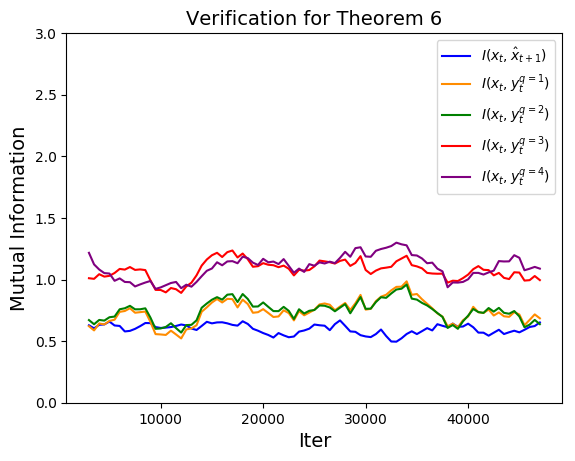

In [36]:
rgb_list,hex_list = generate_colors(12,'cubehelix')
print(rgb_list)
print(hex_list)
#plt.plot(Ts,Isshat_3,label='$I(x_t,\hat{x}_t)$',color='skyblue',linestyle='-.')
#plt.plot(Ts,Isshat_m,label='I(xt,xt_hat_m)')
#plt.plot(Ts,I_xt_yt_1s,label='$I(x_t,y_{t}^{q=1})$',color='orange',linestyle=':')
#plt.plot(Ts,I_xt_yt_2s,label='$I(x_t,y_{t}^{q=2})$',color='limegreen',linestyle=':')
#plt.plot(Ts,I_xt_yt_3s,label='$I(x_t,y_{t}^{q=3})$',color='violet',linestyle=':')
#plt.plot(Ts,I_xt_yt_4s,label='$I(x_t,y_{t}^{q=4})$',color='deepskyblue',linestyle=':')
plt.plot(Ts[6:95],Isshat_3_rol_mean[6:95],label='$I(x_t,\hat{x}_{t+1})$',color='b')
plt.plot(Ts[6:95],I_xt_yt_1s_rol_mean[6:95],label='$I(x_t,y_{t}^{q=1})$',color='darkorange')
plt.plot(Ts[6:95],I_xt_yt_2s_rol_mean[6:95],label='$I(x_t,y_{t}^{q=2})$',color='g')
plt.plot(Ts[6:95],I_xt_yt_3s_rol_mean[6:95],label='$I(x_t,y_{t}^{q=3})$',color='r')
plt.plot(Ts[6:95],I_xt_yt_4s_rol_mean[6:95],label='$I(x_t,y_{t}^{q=4})$',color='purple')
#plt.plot(Ts,I_xt_xt1hat_ms,label='I(xt,xthat)m')
#plt.plot(Ts,errs,label='error')
plt.legend(loc='best')
plt.title('Verification for Theorem 6',fontsize=14) 
plt.ylim(0,3)
plt.xlabel('Iter',fontsize=14)
plt.ylabel('Mutual Information',fontsize=14)
plt.savefig('Boolean_Mutual_Information_rm.svg', dpi=600, format='svg')
plt.show()

In [37]:
rgb_list,hex_list = generate_colors(7,'gnuplot')
print(rgb_list)
print(hex_list)

[(0, 0, 0), (95, 0, 197), (135, 5, 249), (165, 19, 117), (191, 45, 0), (214, 89, 0), (234, 154, 0)]
['#000000', '#5F00C5', '#8705F9', '#A51375', '#BF2D00', '#D65900', '#EA9A00']


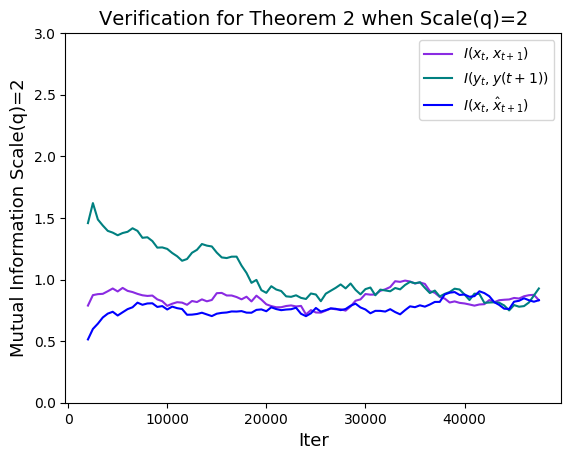

In [38]:
Ts=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500, 22000, 22500, 23000, 23500, 24000, 24500, 25000, 25500, 26000, 26500, 27000, 27500, 28000, 28500, 29000, 29500, 30000, 30500, 31000, 31500, 32000, 32500, 33000, 33500, 34000, 34500, 35000, 35500, 36000, 36500, 37000, 37500, 38000, 38500, 39000, 39500, 40000, 40500, 41000, 41500, 42000, 42500, 43000, 43500, 44000, 44500, 45000, 45500, 46000, 46500, 47000, 47500, 48000, 48500, 49000, 49500, 50000] 
Isst=[0.7953872367959218, 0.7208849320456205, 0.8146949492105946, 0.6939294239498098, 1.1090577036283555, 0.5293769140856515, 1.0712569868049302, 0.9250962886380915, 1.2250226803322153, 0.8493364939711363, 0.8740204107948281, 0.7468141826350286, 1.0242632301219634, 0.9175363289301753, 0.8694011193771899, 0.8169222364561713, 0.8303146677583148, 0.8285511171635419, 1.0773683578430526, 0.7351576006730678, 0.8220349586020624, 0.777339618645226, 0.712532939795334, 0.7706868478305203, 0.4916746306699059, 0.990466915682214, 0.9530774034863514, 0.7947761240336554, 0.9011703569050625, 1.0425723005624696, 0.7372277394300945, 0.9957053616293003, 0.5543555615090148, 0.87997463999966, 1.0425216944769378, 1.009816790823379, 0.7471977005097463, 0.7922184523030474, 0.7765202814655338, 0.8563128849380174, 0.9493461311589525, 0.6158091940526876, 1.0188561660214988, 0.5624376676925714, 0.6597077786208724, 0.8648313219250765, 0.6514494064404598, 0.7957262268980169, 0.8757299552180795, 0.903136051503714, 0.8650397089504538, 0.6610532049068766, 0.3263156725707322, 0.9136938376438752, 0.467187163035704, 0.8527561660334018, 0.8175530837622689, 0.9657297010701754, 0.8122557247037906, 0.9047297797332321, 0.7535775753934534, 0.9986295671865807, 0.7915493969706981, 1.0238229245443018, 0.9006484683819571, 0.8033572825269638, 0.8297723374572905, 1.2676590754683752, 0.9302033106830866, 1.0910764269725606, 1.2251309565221289, 0.9458867204474348, 0.8949108584364636, 0.9522093545170259, 0.7391883055222054, 0.8868336209602973, 0.7092169545844914, 0.6889062188607863, 0.7923311570598366, 0.7502815977176049, 1.0961776075477232, 0.6236615988114331, 0.9856253564754257, 0.8330970149620366, 0.6912081443756825, 0.8035416811074791, 0.6150708007665758, 0.783414311994959, 0.8167988879034085, 1.0860783268595462, 0.9215148396263162, 0.7840922900983447, 1.0232027564101231, 0.856918670601748, 0.812055848135421, 0.7591389742515275, 0.796243167665335, 0.8716942649563585, 0.8480515895793719, 0.6526175033433784, 1.0407665112246622] 
Isshat=[0.18595991338697435, 0.4227152981933325, 0.6633176045594775, 0.5713849728826712, 1.0124921744375153, 0.4732217995806071, 0.5697208426706343, 0.5076121681049515, 0.7317893889315715, 0.8492741481284707, 0.6138298382617254, 0.9287149975159671, 0.9740751120932668, 0.7214248538700188, 0.7093053589459319, 0.7350232282535477, 0.8248379052374323, 0.6594690557002894, 1.1067165256377665, 0.6763571191316744, 0.7210072359707274, 0.9434019112395654, 0.6768621011420327, 0.7905480791710247, 0.4329881878454195, 0.9683317755316458, 0.6998222855577065, 0.5899283015510126, 0.6397869582349498, 0.6885391409167868, 0.7722688113280702, 1.0463092381256154, 0.5379716082188399, 0.6554429701778164, 0.6271921113318821, 1.036257399535544, 0.7303834987740667, 0.674347247390108, 0.6307882032683798, 0.7252357553456243, 0.649012819043848, 1.0376577256241752, 0.7690754246160018, 0.6941318962161036, 0.4793902699193193, 1.3561474912058755, 0.585972721320246, 0.5856541096911468, 0.6805100035119779, 0.7517126704338879, 0.7705916052754775, 0.5455826124217261, 0.5769668229293266, 0.924471440019475, 0.9124983588456077, 1.0597710202706399, 0.7060745619831104, 0.7260822102191314, 0.6497393441059655, 0.6441364922337061, 0.8623349175051424, 0.8093455625013138, 0.748051518623262, 0.6163213717397588, 0.7450271693679327, 0.7531975459061532, 0.9039352982386504, 0.7228473485324383, 0.59415439601471, 0.837178430746256, 0.6278105486126766, 0.6259483676624926, 1.0878920480309249, 0.9251971675885874, 0.6765252770627544, 0.9038846260894509, 0.7961882562356214, 0.8965667552537157, 0.8037770467861722, 0.8409662592667707, 1.2309966325823756, 0.7683186086626206, 1.1397161398590483, 0.6915086052591511, 0.7115675514618538, 0.7183088262538739, 0.8478267286207236, 1.2933090257927755, 0.6559263009739164, 0.5868886190644516, 0.7490079394097838, 0.5435844290315316, 0.8351906073814854, 0.6635961163221281, 1.3079851280927626, 0.7906725674347622, 1.052854807259038, 1.1315890887637792, 0.5380022128108849, 0.7056262575923057, 0.8470710562600385] 
Irrt=[2.3691643571507144, 1.8529136411922071, 1.9602293072427026, 1.6773075835757287, 1.8208079709914131, 1.3588805991913577, 1.4519421117145648, 0.8342236571611418, 1.2539060349626676, 1.624289338226965, 1.0379548837704762, 1.3621540977394833, 1.5275412240860247, 1.5350080985769963, 1.6070552936228941, 1.5402431208497414, 1.5516618369854094, 1.1209417635774506, 1.040797538351743, 1.0630385679621535, 1.081338581551833, 1.054129632525881, 0.9937705372202491, 1.553322877292837, 1.4862174547460851, 1.2088101896103247, 1.2862331118879025, 0.7547755640166396, 1.183761919085145, 1.569483622123222, 1.3205152640764444, 1.5250445968417117, 0.8623478356653831, 1.4865600802322867, 0.986709056290215, 0.8189147031057411, 1.2343232313722565, 0.8671901400444704, 1.186495216659164, 0.8384507684312575, 0.7296045490978726, 0.7196647467329036, 1.1008090053915423, 0.6550795230266918, 0.7680002439444822, 1.3563968010897431, 0.9663052458955746, 0.7453561414014032, 0.7548489919238098, 0.7993431594128867, 0.8531590068131184, 0.5104808382114934, 1.0120287865354078, 1.099770440827002, 0.685483289299286, 0.8136575830678717, 1.5768376198422491, 0.9836763896189243, 0.9915672692404977, 1.0747517609264405, 0.5327830026819874, 0.9077111965946705, 0.4972762676055924, 0.7326343203253244, 1.110012875147337, 0.9429839621842153, 0.9452318173225338, 1.4449782357162126, 0.9255839476123685, 1.006600143740974, 0.7991621456873749, 0.7975126487291349, 0.8525343001071206, 0.98530105525578, 0.9939882149900546, 1.025424317277498, 0.49076451422873246, 1.0271997253274638, 1.1233931515070483, 0.5295242537500493, 1.009967020297165, 0.9462817084021531, 1.1237629653062406, 0.9184822854756447, 0.5884135071604867, 0.5760994127995849, 1.0085857620276282, 1.0007625938922333, 0.40655832127646524, 0.5537556229499527, 1.0288121922482893, 0.9106425118638473, 0.9033583601036393, 0.5149174164637496, 1.0232956125275037, 0.4423782691011143, 1.057977520231703, 1.2953920504303247, 0.9719887410025668, 1.1244653836023049, 0.9257012251820335] 
errs=[0.919816269717875, 0.6160683069271189, 0.5789976041461042, 0.49498760569878625, 0.36044536825646584, 0.40491717531929045, 0.3612899782959888, 0.17926575270387343, 0.23961059148900135, 0.36533097012474836, 0.17462839901812685, 0.2581129320402383, 0.24991828076040556, 0.3466744859741517, 0.39097020041354447, 0.3618286311343619, 0.3413445247581395, 0.1906241484453071, 0.026965106415488486, 0.17012608664346068, 0.15176138003210501, 0.11374924911449413, 0.14173447467128628, 0.3643470591761335, 0.48325877771518, 0.10852220322584674, 0.24014082397044872, 0.08865494604236167, 0.22213310077711163, 0.36194508452183727, 0.2670884967943939, 0.23850188024806107, 0.14920068952695809, 0.35104859076146416, 0.18404895089470708, 0.09682777412349779, 0.2336971578511209, 0.07937446843757444, 0.23526051064827594, 0.05804012816459369, 0.12692144911358708, 0.17946268384500758, 0.1410885676414539, 0.055227781895509295, 0.11904125293219671, 0.2316674485978567, 0.1660235007404941, 0.08954960070206705, 0.0804496543941045, 0.06321978264890615, 0.0420039299322141, 0.06432351383939952, 0.28329556336801287, 0.08529061342730554, 0.18180914952421137, 0.1079895432368535, 0.38689199906727556, 0.11742977322719769, 0.13960680275073195, 0.17708938270765048, 0.1371061500223846, 0.07729480542512268, 0.1296906432888304, 0.17139202003133003, 0.14954226788225827, 0.08029839672790465, 0.04776846790166966, 0.3072702250142447, 0.15733748555156418, 0.10556943568119852, 0.2511313218504389, 0.13072860661135732, 0.10243197294947544, 0.024579115374079225, 0.1372881665038773, 0.061707206868572145, 0.12848222453353395, 0.13929599490246497, 0.15343746715987489, 0.13078975306285104, 0.09095940753516306, 0.13194285399382294, 0.06918611957417317, 0.09360375923949805, 0.0539013105642435, 0.09381905885180665, 0.16154559504619226, 0.20891686534238466, 0.16877391222519186, 0.24350578840888548, 0.11525901864376553, 0.15223907588481658, 0.07771607156797031, 0.14001738924415313, 0.20320110702132063, 0.1572827002135401, 0.1221932199776261, 0.17445042056194812, 0.18252407457321979, 0.2110493790584683, 0.07954080210162302]

Isst_rol_mean = moving_average(Isst,10)
Irrt_rol_mean = moving_average(Irrt,10)
Isshat_rol_mean = moving_average(Isshat,10)

#plt.plot(Ts,Isst,label='$I(x_t,x_{t+1})$',color='gold',linestyle='-.')
#plt.plot(Ts,Irrt,label='$I(y_t,y(t+1))$',color='skyblue',linestyle='-.')
#plt.plot(Ts,Isshat,label='$I(x_t,\hat{x}_{t+1})$',color='thistle',linestyle='-.')
#plt.plot(Ts,I_yt_yt1_ms,label='I(xt,xthat)m')
#plt.plot(Ts,I_xt_xt1hat_ms,label='I(xt,xthat)m')
#plt.plot(Ts,errs,label='error',color=hex_list[3])
plt.plot(Ts[4:96],Isst_rol_mean[4:96],label='$I(x_t,x_{t+1})$',color='blueviolet')
plt.plot(Ts[4:96],Irrt_rol_mean[4:96],label='$I(y_t,y(t+1))$',color='teal')
plt.plot(Ts[4:96],Isshat_rol_mean[4:96],label='$I(x_t,\hat{x}_{t+1})$',color='b')
plt.ylim(0,3)
plt.legend(loc='best')
plt.title('Verification for Theorem 2 when Scale(q)=2',fontsize=14) 
plt.xlabel('Iter',fontsize=13)
plt.ylabel('Mutual Information Scale(q)=2',fontsize=13)
plt.savefig('Boolean_Mutual_Information_Scale2.svg', dpi=600, format='svg')
plt.show()

### Learned Mapping

In [39]:
xx=torch.tensor([[ 4.],
        [ 5.],
        [ 5.],
        [13.],
        [15.],
        [14.],
        [12.],
        [11.],
        [ 4.],
        [14.],
        [ 8.],
        [ 2.],
        [ 7.],
        [ 3.],
        [ 9.],
        [10.],
        [ 4.],
        [ 6.],
        [ 4.],
        [ 7.],
        [14.],
        [ 9.],
        [11.],
        [ 0.],
        [ 9.],
        [ 6.],
        [ 0.],
        [ 2.],
        [13.],
        [ 6.],
        [ 0.],
        [ 8.],
        [ 4.],
        [ 6.],
        [ 0.],
        [ 9.],
        [ 9.],
        [ 5.],
        [ 1.],
        [ 2.],
        [12.],
        [ 5.],
        [ 6.],
        [ 5.],
        [14.],
        [14.],
        [ 3.],
        [14.],
        [ 6.],
        [13.],
        [15.],
        [ 4.],
        [ 7.],
        [12.],
        [15.],
        [ 0.],
        [ 9.],
        [ 5.],
        [ 6.],
        [14.],
        [12.],
        [ 4.],
        [12.],
        [ 8.],
        [ 4.],
        [15.],
        [ 0.],
        [ 8.],
        [11.],
        [ 2.],
        [ 7.],
        [ 9.],
        [ 3.],
        [ 9.],
        [12.],
        [10.],
        [12.],
        [13.],
        [ 6.],
        [12.],
        [ 5.],
        [13.],
        [ 0.],
        [ 3.],
        [15.],
        [15.],
        [ 9.],
        [12.],
        [14.],
        [ 1.],
        [12.],
        [ 3.],
        [11.],
        [ 6.],
        [ 1.],
        [10.],
        [12.],
        [12.],
        [ 5.],
        [13.]]) 
        
yy=torch.tensor([[ 0.1496],
        [-0.3200],
        [-0.3200],
        [ 1.2524],
        [15.0741],
        [ 1.2099],
        [ 1.2434],
        [ 3.2241],
        [ 0.1496],
        [ 1.2099],
        [-0.6525],
        [ 0.2869],
        [ 3.2189],
        [ 3.2064],
        [-0.2851],
        [ 0.4935],
        [ 0.1496],
        [-0.4967],
        [ 0.1496],
        [ 3.2189],
        [ 1.2099],
        [-0.2851],
        [ 3.2241],
        [-0.3341],
        [-0.2851],
        [-0.4967],
        [-0.3341],
        [ 0.2869],
        [ 1.2524],
        [-0.4967],
        [-0.3341],
        [-0.6525],
        [ 0.1496],
        [-0.4967],
        [-0.3341],
        [-0.2851],
        [-0.2851],
        [-0.3200],
        [-0.4330],
        [ 0.2869],
        [ 1.2434],
        [-0.3200],
        [-0.4967],
        [-0.3200],
        [ 1.2099],
        [ 1.2099],
        [ 3.2064],
        [ 1.2099],
        [-0.4967],
        [ 1.2524],
        [15.0741],
        [ 0.1496],
        [ 3.2189],
        [ 1.2434],
        [15.0741],
        [-0.3341],
        [-0.2851],
        [-0.3200],
        [-0.4967],
        [ 1.2099],
        [ 1.2434],
        [ 0.1496],
        [ 1.2434],
        [-0.6525],
        [ 0.1496],
        [15.0741],
        [-0.3341],
        [-0.6525],
        [ 3.2241],
        [ 0.2869],
        [ 3.2189],
        [-0.2851],
        [ 3.2064],
        [-0.2851],
        [ 1.2434],
        [ 0.4935],
        [ 1.2434],
        [ 1.2524],
        [-0.4967],
        [ 1.2434],
        [-0.3200],
        [ 1.2524],
        [-0.3341],
        [ 3.2064],
        [15.0741],
        [15.0741],
        [-0.2851],
        [ 1.2434],
        [ 1.2099],
        [-0.4330],
        [ 1.2434],
        [ 3.2064],
        [ 3.2241],
        [-0.4967],
        [-0.4330],
        [ 0.4935],
        [ 1.2434],
        [ 1.2434],
        [-0.3200],
        [ 1.2524]])

state=torch.tensor([[0., 1., 0., 0.],
        [0., 1., 0., 1.],
        [0., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 1., 0., 0.],
        [1., 0., 1., 1.],
        [0., 1., 0., 0.],
        [1., 1., 1., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 1., 1.],
        [0., 0., 1., 1.],
        [1., 0., 0., 1.],
        [1., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 1., 1.],
        [1., 1., 1., 0.],
        [1., 0., 0., 1.],
        [1., 0., 1., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 1.],
        [0., 1., 1., 0.],
        [0., 0., 0., 0.],
        [0., 0., 1., 0.],
        [1., 1., 0., 1.],
        [0., 1., 1., 0.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 1., 0.],
        [0., 0., 0., 0.],
        [1., 0., 0., 1.],
        [1., 0., 0., 1.],
        [0., 1., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [1., 1., 0., 0.],
        [0., 1., 0., 1.],
        [0., 1., 1., 0.],
        [0., 1., 0., 1.],
        [1., 1., 1., 0.],
        [1., 1., 1., 0.],
        [0., 0., 1., 1.],
        [1., 1., 1., 0.],
        [0., 1., 1., 0.],
        [1., 1., 0., 1.],
        [1., 1., 1., 1.],
        [0., 1., 0., 0.],
        [0., 1., 1., 1.],
        [1., 1., 0., 0.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 1.],
        [0., 1., 0., 1.],
        [0., 1., 1., 0.],
        [1., 1., 1., 0.],
        [1., 1., 0., 0.],
        [0., 1., 0., 0.],
        [1., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 1., 1., 1.],
        [0., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 1., 1.],
        [0., 0., 1., 0.],
        [0., 1., 1., 1.],
        [1., 0., 0., 1.],
        [0., 0., 1., 1.],
        [1., 0., 0., 1.],
        [1., 1., 0., 0.],
        [1., 0., 1., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 1.],
        [0., 1., 1., 0.],
        [1., 1., 0., 0.],
        [0., 1., 0., 1.],
        [1., 1., 0., 1.],
        [0., 0., 0., 0.],
        [0., 0., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 0., 0., 1.],
        [1., 1., 0., 0.],
        [1., 1., 1., 0.],
        [0., 0., 0., 1.],
        [1., 1., 0., 0.],
        [0., 0., 1., 1.],
        [1., 0., 1., 1.],
        [0., 1., 1., 0.],
        [0., 0., 0., 1.],
        [1., 0., 1., 0.],
        [1., 1., 0., 0.],
        [1., 1., 0., 0.],
        [0., 1., 0., 1.],
        [1., 1., 0., 1.]])

latent=torch.tensor([[ 0.1496],
        [-0.3200],
        [-0.3200],
        [ 1.2524],
        [15.0741],
        [ 1.2099],
        [ 1.2434],
        [ 3.2241],
        [ 0.1496],
        [ 1.2099],
        [-0.6525],
        [ 0.2869],
        [ 3.2189],
        [ 3.2064],
        [-0.2851],
        [ 0.4935],
        [ 0.1496],
        [-0.4967],
        [ 0.1496],
        [ 3.2189],
        [ 1.2099],
        [-0.2851],
        [ 3.2241],
        [-0.3341],
        [-0.2851],
        [-0.4967],
        [-0.3341],
        [ 0.2869],
        [ 1.2524],
        [-0.4967],
        [-0.3341],
        [-0.6525],
        [ 0.1496],
        [-0.4967],
        [-0.3341],
        [-0.2851],
        [-0.2851],
        [-0.3200],
        [-0.4330],
        [ 0.2869],
        [ 1.2434],
        [-0.3200],
        [-0.4967],
        [-0.3200],
        [ 1.2099],
        [ 1.2099],
        [ 3.2064],
        [ 1.2099],
        [-0.4967],
        [ 1.2524],
        [15.0741],
        [ 0.1496],
        [ 3.2189],
        [ 1.2434],
        [15.0741],
        [-0.3341],
        [-0.2851],
        [-0.3200],
        [-0.4967],
        [ 1.2099],
        [ 1.2434],
        [ 0.1496],
        [ 1.2434],
        [-0.6525],
        [ 0.1496],
        [15.0741],
        [-0.3341],
        [-0.6525],
        [ 3.2241],
        [ 0.2869],
        [ 3.2189],
        [-0.2851],
        [ 3.2064],
        [-0.2851],
        [ 1.2434],
        [ 0.4935],
        [ 1.2434],
        [ 1.2524],
        [-0.4967],
        [ 1.2434],
        [-0.3200],
        [ 1.2524],
        [-0.3341],
        [ 3.2064],
        [15.0741],
        [15.0741],
        [-0.2851],
        [ 1.2434],
        [ 1.2099],
        [-0.4330],
        [ 1.2434],
        [ 3.2064],
        [ 3.2241],
        [-0.4967],
        [-0.4330],
        [ 0.4935],
        [ 1.2434],
        [ 1.2434],
        [-0.3200],
        [ 1.2524]])

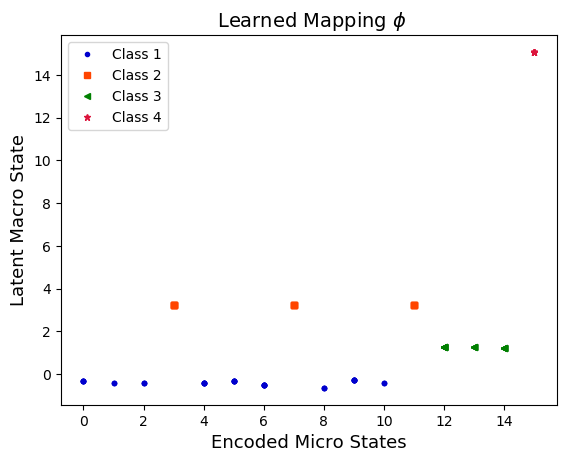

In [40]:
xx = torch.zeros(state.size()[0],1)
for i in range(state.size()[0]):
    v = 0
    for j in range(state.size()[1]):
        v = v * 2 + int(state[i,j].item())
    xx[i] = v
    
yy = latent
for i in range(yy.size()[1]):
    bools1 = (yy[:,i]<0.5)
    plt.plot(xx[bools1].data, yy[bools1,i].data,'o',markersize=3, label='Class 1',color='mediumblue')
    bools2 = (yy[:,i]<4)&(yy[:,i]>2)
    plt.plot(xx[bools2].data, yy[bools2,i].data,'s',markersize=4, label='Class 2',color='orangered')
    bools3 = (yy[:,i]<2)&(yy[:,i]>0.5)
    plt.plot(xx[bools3].data, yy[bools3,i].data,'<',markersize=4, label='Class 3',color='g')
    bools4 = (yy[:,i]>10)
    plt.plot(xx[bools4].data, yy[bools4,i].data,'*',markersize=5, label='Class 4',color='crimson')
plt.xlabel('Encoded Micro States',fontsize=14)
plt.ylabel('Latent Macro State',fontsize=14)
plt.legend()
#plt.savefig('Boolean_class.svg', dpi=600, format='svg')
plt.show()

## Data of Simple Markov Chain

### Casual Emergence

[(0, 255, 255), (127, 128, 255)]
['#00FFFF', '#7F80FF']


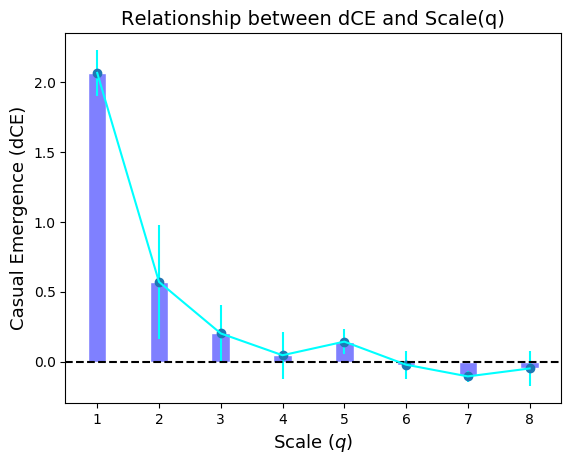

In [41]:
rgb_list,hex_list = generate_colors(2,'cool')
print(rgb_list)
print(hex_list)
#Spring data
ces=[[-0.139, 0.165, -0.003, -0.195, -0.072],
[-0.064, -0.072, -0.151, -0.082, -0.158],
[-0.014, 0.102, -0.115, -0.155, 0.074],
[0.021,	0.051,	0.207,	0.189,	0.249],
[-0.101,0.001,-0.045,0.370,0.005],
[ 0.090 ,0.530,0.287,0.192 , -0.089 ],
[ 0.740 ,0.599, 0.673,-0.194,1.037],
[2.298,1.907,2.221,1.895,2.009]]



scales=torch.Tensor([8,7,6,5,4,3,2,1])
means=[]
stds=[]

for ce in ces:
    m=np.mean(ce)
    std=np.std(ce)
    means.append(m)
    stds.append(std)

#plt.figure(figsize=(3.92*2,2.66*2), dpi = 80)
plt.plot(scales, means,'o')
plt.errorbar(scales, means, stds,color=hex_list[0])
plt.bar(scales, means, width=0.3, facecolor=hex_list[1], edgecolor='white')
plt.xlabel('Scale ($q$)',fontsize=13)
plt.ylabel('Casual Emergence (dCE)',fontsize=13)
plt.title('Relationship between dCE and Scale(q)',fontsize=14) 
plt.axhline(0, color='black', linestyle='--')
plt.savefig('Simple_casual_emergence.svg', dpi=600, format='svg')
plt.show()

### Learned Mapping

In [42]:
yy=torch.tensor([[-7.1002],
        [-6.7903],
        [-6.4804],
        [-6.1705],
        [-5.8605],
        [-5.5506],
        [-5.2407],
        [-4.9307],
        [-4.6206],
        [-4.3103],
        [-3.9999],
        [-3.6896],
        [-3.3792],
        [-3.0689],
        [-2.7725],
        [-2.4815],
        [-2.1905],
        [-1.8995],
        [-1.6084],
        [-1.3385],
        [-1.0733],
        [-0.8081],
        [-0.5429],
        [-0.2933],
        [-0.0777],
        [ 0.0942],
        [ 0.2406],
        [ 0.3709],
        [ 0.4539],
        [ 0.5141],
        [ 0.5602],
        [ 0.5916],
        [ 0.6087],
        [ 0.6200],
        [ 0.6259],
        [ 0.6293],
        [ 0.6328],
        [ 0.6353],
        [ 0.6360],
        [ 0.6364],
        [ 0.6369],
        [ 0.6374],
        [ 0.6379],
        [ 0.6385],
        [ 0.6390],
        [ 0.6389],
        [ 0.6387],
        [ 0.6404],
        [ 0.6421],
        [ 0.6443],
        [ 0.6468],
        [ 0.6493],
        [ 0.6519],
        [ 0.6547],
        [ 0.6575],
        [ 0.6604],
        [ 0.6632],
        [ 0.6655],
        [ 0.6667],
        [ 0.6679],
        [ 0.6691],
        [ 0.6712],
        [ 0.6733],
        [ 0.6754],
        [ 0.6775],
        [ 0.6796],
        [ 0.6817],
        [ 0.6838],
        [ 0.6857],
        [ 0.6872],
        [ 0.6888],
        [ 0.6883],
        [ 0.6872],
        [ 0.6872],
        [ 0.6899],
        [ 0.6929],
        [ 0.6958],
        [ 0.6989],
        [ 0.7019],
        [ 0.7048],
        [ 0.7076],
        [ 0.7112],
        [ 0.7153],
        [ 0.7201],
        [ 0.7249],
        [ 0.7299],
        [ 0.7360],
        [ 0.7403],
        [ 0.7440],
        [ 0.7460],
        [ 0.7479],
        [ 0.7500],
        [ 0.7531],
        [ 0.7595],
        [ 0.7675],
        [ 0.7749],
        [ 0.7800],
        [ 0.7851],
        [ 0.7902],
        [ 0.7952]])

torch.Size([100, 1])


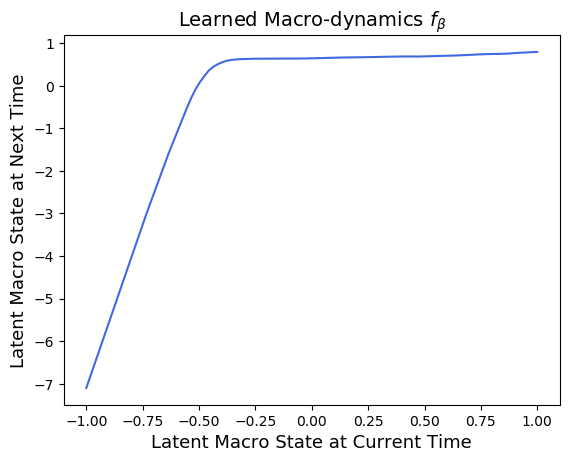

In [43]:
xx=torch.linspace(-1,1,100).unsqueeze(1)
#xx=xx.repeat(1, 2)
print(xx.size())
plt.plot(xx[:,0].data,yy[:,0].data,color='royalblue')
plt.xlabel('Latent Macro State at Current Time',fontsize=13)
plt.ylabel('Latent Macro State at Next Time',fontsize=13)
plt.title('Learned Macro-dynamics $f_{\\beta}$',fontsize=14) 
plt.savefig('Simple_Markov1.svg', dpi=600, format='svg')
plt.show()

In [44]:
latent=torch.tensor([ 0.6753,  0.5495,  0.4690,  0.5272,  0.5069,  0.4548,  0.6036, -2.7619])

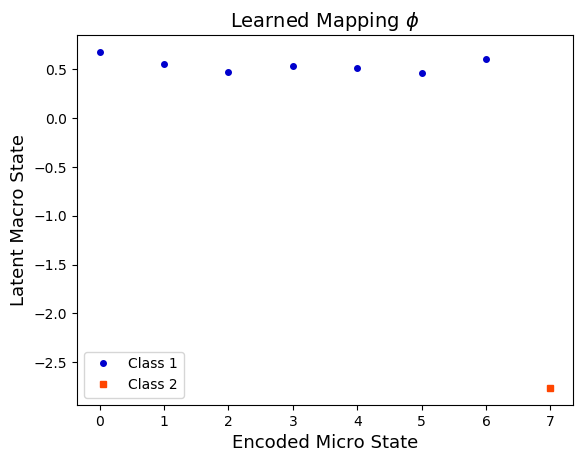

In [45]:
state=torch.eye(8)
bools = latent>-0.25
xx=np.array(range(8))
plt.plot(xx[bools], latent[bools].data, 'o', markersize=4, label='Class 1',color='mediumblue')
plt.plot(xx[~bools],latent[~bools].data, 's', markersize=4, label='Class 2',color='orangered')
plt.xlabel('Encoded Micro State',fontsize=13)
plt.ylabel('Latent Macro State',fontsize=13)
plt.title('Learned Mapping $\phi$',fontsize=14) 
plt.legend()
plt.savefig('Simple_Markov2.svg', dpi=600, format='svg')
plt.show()

### Mutual Information

In [46]:
Ts=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500, 22000, 22500, 23000, 23500, 24000, 24500, 25000, 25500, 26000, 26500, 27000, 27500, 28000, 28500, 29000, 29500, 30000, 30500, 31000, 31500, 32000, 32500, 33000, 33500, 34000, 34500, 35000, 35500, 36000, 36500, 37000, 37500, 38000, 38500, 39000, 39500, 40000, 40500, 41000, 41500, 42000, 42500, 43000, 43500, 44000, 44500, 45000, 45500, 46000, 46500, 47000, 47500, 48000, 48500, 49000, 49500, 50000, 50500]

Isshat_1=[0.2841202987304378, -0.32951345299682766, 2.682596165863873, 2.9820971967817447, 2.654725429244621, 3.0263745571546443, 2.6342080815311824, 2.5558252957411183, 2.5634677299914235, 2.616554638211615, 2.5654143636342677, 2.215547350427511, 2.3292508207163363, 2.1322713127778896, 1.3517438129059964, 2.6731730432238963, 2.220675546997342, 3.000340058523658, 2.617320115700905, 2.2230058599706695, 2.1400536333271214, 2.1585961872088792, 2.524013670406857, 2.356960402255714, 2.560938169455752, 1.9428052170327343, 2.6093922590359866, 2.202531940301684, 2.997117254916388, 2.1467532697641043, 2.1626960244122464, 1.6935244978444837, 2.623972542833892, 2.996366762041583, 2.1250162793494627, 1.732479071916789, 2.552814062066824, 2.6529813973615695, 1.716015409168706, 2.5551260733503005, 2.974237159114475, 2.5383821299328884, 2.211091153309533, 2.1729474658343038, 2.5960245983682526, 2.144761031618904, 2.160242070796551, 2.575319128859973, 2.6537706651442243, 2.249683505079543, 2.119869421953828, 2.256970144612804, 2.4819568767468767, 2.9991437919754746, 2.095804278005794, 2.659220325957049, 2.226975991976317, 2.5875372592404213, 2.2705936714209507, 2.5995692878754504, 2.1667481153749955, 2.2229304484857515, 3.0095730505624516, 3.00587383250889, 2.1562800407626925, 2.522524348921963, 2.2610450665397512, 2.55156225308307, 2.1562360611504943, 2.5954371901258546, 2.5475926706059293, 2.5254092185509838, 2.192078913389101, 2.1413399869132785, 2.5699755850413135, 2.36036762501994, 2.1483816039447476, 2.67954159252613, 2.5901539897253283, 2.9917710040627887, 2.519090083240257, 2.153661238766695, 2.583228809713243, 2.1390807982380418, 2.636699064482365, 2.557931882003818, 2.605127509010296, 2.6412346185091042, 2.574326075749207, 2.997981206492101, 1.7978203881083104, 2.2563998617617806, 2.2718907335742524, 2.1465251513174666, 1.788365756246227, 2.6293937190788195, 1.7265240062050358, 2.557794794946083, 2.151801759233781, 2.2388392860722086, 1.806770427513861] 

Isshat_2=[0.060439114611874054, -0.1689556192329987, 2.664136915074102, 2.9788912078019907, 2.647027254125252, 2.6715407723882394, 2.6374140705109346, 2.5792237612129107, 2.5593977894359603, 2.6213636216812444, 2.5788626437230247, 2.1861257903380893, 2.3301553389753344, 2.1648956472859213, 1.3992407662261477, 2.6942764727728807, 2.255690368549376, 3.0083550309730414, 2.6373027075391824, 2.153305625210368, 2.1686704816104623, 2.1334767814489064, 2.53776505050949, 2.2222101712328173, 2.5345918326469454, 1.7967801702287758, 2.6176476806588505, 2.1407756281599086, 2.997117254916388, 2.113425275415544, 2.2504816077768344, 1.7673745055345043, 2.623972542833892, 2.9931607730618293, 2.1365635420285156, 1.860033504686771, 2.5635249797946362, 2.6593933753210743, 1.7452615169907189, 2.6654272340497314, 2.9758401536043517, 2.5313690290396775, 2.1265628131096763, 2.1466074876004804, 2.60243657632776, 2.120317196165187, 2.164645922169077, 2.565701161920713, 2.6569766541239783, 2.2092740279627003, 2.1428458271645967, 2.3436028880617426, 2.4819568767468767, 2.9847168415665855, 2.1245184283262093, 2.6212854542643584, 2.246484917021721, 2.6002123656710894, 2.2166055778599656, 2.5963632988956964, 2.1744256153001946, 2.18517457548118, 3.004764067092821, 3.013888804958273, 2.2117302248132416, 2.5209213544320876, 2.224920074947209, 2.571300177341314, 2.175097402440262, 2.579886061763024, 2.5704885006786475, 2.530218202020613, 2.1788361299623955, 2.185506703515932, 2.5747845685109425, 2.3218884398136534, 2.1673358198076866, 2.67954159252613, 2.521832146755881, 2.9949769930425423, 2.520693077730134, 2.1757259864508796, 2.5633008094389247, 2.1348252981166653, 2.614061500940509, 2.557931882003818, 2.6099364924799255, 2.622133487849343, 2.5695170922795767, 2.9931722230224707, 1.8477099238464512, 2.240963514760214, 2.2663947524661032, 2.074887057929861, 1.8271922178748803, 2.6513093336843, 1.7874276585701874, 2.5731658466551792, 2.132794824568101, 2.244484614493078, 1.8696482179505252] 

Isshat_3=[-0.011699580942257783, -0.1602994489876646, -0.1802348713708584, 1.082340266694107, 2.647027254125252, 2.6715407723882394, 2.614449723130571, 2.5494133177816134, 2.552985811476454, 2.6072319597310156, 2.5663761603281947, 2.232601131031026, 2.3111928345397046, 2.1082448578064694, 1.3498046363331981, 2.684375624453056, 2.2786827314273346, 3.0035460475034106, 2.627684740599922, 2.1484966417407385, 2.1971236338057727, 2.1016190964795114, 2.5272196593866108, 2.2427546212881606, 2.5345918326469454, 1.7839562143097634, 2.6365883260787086, 2.11983627980177, 2.997117254916388, 2.1000993291168064, 2.1949819204164425, 1.8056441684634044, 2.623972542833892, 2.994763767551706, 2.233056529212154, 1.7249033615938532, 2.5798279158602875, 2.688464775838208, 1.751868488365633, 2.562631002098358, 3.013126900882103, 2.5675337070989768, 2.16463604144752, 2.1242258555066242, 2.616007190206531, 2.1106992292259275, 2.165435772943752, 2.5737161343700974, 2.633650726951435, 2.259248741936899, 2.1444488216544735, 2.2748354528814176, 2.5292084180623093, 2.991128819526093, 2.0982712240713832, 2.6228884487542357, 2.246484917021721, 2.6002123656710894, 2.236578182000376, 2.5995692878754504, 2.245685516503018, 2.1803655920115492, 3.041850440059339, 3.002667843529136, 2.2117302248132416, 2.5241273434118403, 2.2434971156360586, 2.571300177341314, 2.175097402440262, 2.581489056252901, 2.5752974841482783, 2.647767685630793, 2.2065058637979904, 2.1646280724976323, 2.5715785795311903, 2.36036762501994, 2.2309162673383085, 2.67954159252613, 2.5282441247153873, 2.9869620205931593, 2.51748708875038, 2.146827420151959, 2.5665067984186782, 2.108177404018191, 2.624987173910983, 2.5515199040443117, 2.602140110188254, 2.620530493359467, 2.5711200867694535, 2.991569228532594, 1.733666114489235, 2.321927708685723, 2.2663947524661032, 2.104685060047846, 1.7988581678986277, 2.6513093336843, 1.7077687507659278, 2.5682767134610556, 2.116410285797719, 2.244484614493078, 1.836580611090599] 

Isshat_4=[0.004784491735428843, -0.1602994489876646, 2.604391119549957, 2.9820971967817433, 2.68304233399805, 2.6715407723882394, 2.6310020925514284, 2.5913086742177596, 2.552985811476454, 2.62296661617112, 2.572788138287701, 2.1819547522375085, 2.2816563399144223, 2.2393664844975705, 1.3327641079516828, 2.684375624453056, 2.229492016691665, 3.006752036483164, 2.620526104680658, 2.143687658271108, 2.1322782882837115, 2.1235325132597302, 2.53202864285624, 2.2384349729785975, 2.5657471529253826, 1.800632425761761, 2.6624537376160897, 2.103402181927687, 2.997117254916388, 2.1467532697641043, 2.1782159256096896, 1.7139312342369566, 2.611126727899108, 2.9979697565314596, 2.245771751939395, 1.7342931154065437, 2.664718217256133, 2.628025852043127, 1.781668739065111, 2.5690429800578656, 2.972634164624598, 2.5490019684283207, 2.126562813109675, 2.1854339492291333, 2.6074459341086245, 2.1559819930480395, 2.1593612675084297, 2.605921531801435, 2.6908570381107415, 2.218829634834729, 2.1303237338443255, 2.2354391498486086, 2.493177838176012, 2.991128819526093, 2.0751308762423304, 2.664783805190383, 2.577711211285651, 2.570579890158036, 2.2303872337221464, 2.5963632988956964, 2.1667481153749955, 2.230945420935136, 3.0063670615826976, 3.0042708380190133, 2.220448705177208, 2.5209213544320876, 2.2152697102266887, 2.5284219052540173, 2.1219714969856, 2.588338214527829, 2.601054471927157, 2.5254092185509838, 2.2040365450801294, 2.136342380407811, 2.5699755850413135, 2.305740193740509, 2.116831071851313, 2.67954159252613, 2.5116445002363714, 2.9933739985526655, 2.5571222498802624, 2.107007298119397, 2.597318287597948, 2.1421990727700986, 2.6281931628907365, 2.5515199040443117, 2.6083334979900497, 2.628228668478835, 2.5775320647289597, 2.9947752175123474, 1.8033580054369769, 2.19234731281782, 2.2663947524661032, 2.1304952064187015, 1.7931747397158577, 2.6344431517219293, 1.7325846511616851, 2.56667371897118, 2.1083953133483373, 2.236000662085333, 1.8112094891781352]

I_xt_yt_1s=[3.020104562710582, 2.4049913152040685, 2.7351234667188233, 3.098151174215983, 2.9392855325320153, 3.4054090899280145, 2.7914335555768544, 2.8694746892260286, 2.744616316228476, 2.8560653858203797, 2.752029121332049, 2.348589287340747, 2.499334211519724, 2.247346279719909, 1.3998696537237922, 2.864175561673019, 2.356074515534985, 3.1926650474269267, 2.9125778269411957, 2.4385913943652704, 2.3776830607933066, 2.4334982922620787, 2.7764056732906908, 2.568736897275723, 2.8209729409984488, 2.0755299379909133, 2.8221096278426145, 2.3743239229500954, 3.336304843715342, 2.1467532697641043, 2.1707109968616307, 1.7663462475274512, 2.6223695483440164, 3.036241249977264, 2.1250162793494627, 1.7340820664066658, 2.6048541331846047, 2.7684942757452995, 1.7680554802864867, 2.613721246935613, 3.086060685527487, 2.645284637913853, 2.146755289601712, 2.174750834635416, 2.671113440258332, 2.1907207332526943, 2.220440238871739, 2.656839516222151, 2.7059538607700304, 2.245307828958608, 2.1767184765412364, 2.256970144612804, 2.561190604389349, 3.0676202815948117, 2.179331740889009, 2.7603807282289057, 2.273773302269376, 2.660359008923389, 2.4136895049912, 2.7099411339309336, 2.2981592641101107, 2.2701615361339016, 3.071030714308257, 3.121054662034004, 2.1562800407626925, 2.5549112337698983, 2.3054942541350036, 2.60406032262653, 2.1562360611504943, 2.6756155395212895, 2.6170653068011203, 2.5859222605438283, 2.2161238307372506, 2.1461489703829093, 2.639448221236503, 2.4101952915048663, 2.14196962598524, 2.67954159252613, 2.666871808708278, 3.0798212013995836, 2.6005909030898415, 2.153661238766695, 2.626309286628678, 2.1052004142512772, 2.6543402388187736, 2.6246106782495224, 2.64381687646669, 2.642837612998981, 2.575929070239083, 3.0318615904788655, 1.7978203881083104, 2.2582032305628927, 2.626724518340657, 2.1465251513174666, 2.1431995410126334, 2.6293937190788195, 1.7281270006949128, 2.590072184442972, 2.185682143220544, 2.2388392860722086, 1.806770427513861] 

I_xt_yt_2s=[3.035138441103151, 2.3915274108112197, 2.7627336730422134, 2.980494202291866, 2.647027254125252, 2.6715407723882394, 2.6326050870413065, 2.5792237612129107, 2.557794794946083, 2.6277755996407506, 2.5788626437230247, 2.1909347738077174, 2.3285523444854577, 2.158483669326415, 1.3992407662261477, 2.6942764727728807, 2.2895707525361404, 3.039029425980052, 2.6647711135664394, 2.1823770257275017, 2.2449672447954265, 2.1334767814489064, 2.5409710394892437, 2.2576935497094577, 2.544209799586205, 1.7887651977793941, 2.611235702699343, 2.1439816171396626, 2.997117254916388, 2.113425275415544, 2.23585428305671, 1.7673745055345043, 2.6594559213105335, 3.002778740001089, 2.1413725254981437, 1.860033504686771, 2.5587159963250055, 2.688464775838208, 1.7470648857918296, 2.6042973593216665, 3.011323532080991, 2.5989182964463877, 2.228065199508505, 2.1466074876004804, 2.607245559797391, 2.120317196165186, 2.164645922169077, 2.56730415641059, 2.650765050475706, 2.204264670181836, 2.2426650693490564, 2.3436028880617426, 2.522249238693146, 3.0562046212819194, 2.1229154338363325, 2.619682459774483, 2.2536983922261653, 2.6002123656710894, 2.2246205503093486, 2.591554315426066, 2.17602860979007, 2.1867775699710554, 3.0079700560725744, 3.0429602054754072, 2.2117302248132416, 2.558007727398605, 2.224920074947209, 2.5584762214223016, 2.175097402440262, 2.5830920507427777, 2.5736944896584015, 2.650973674610547, 2.18838123351575, 2.182300714536178, 2.5763875630008197, 2.3218884398136534, 2.1673358198076866, 3.034375377292535, 2.560521514212275, 3.032063366009058, 2.5658636929154834, 2.168088189175584, 2.6003871824054414, 2.1687056821034285, 2.615664495430386, 2.5918122659905825, 2.64381687646669, 2.657616866325983, 2.5711200867694535, 2.9947752175123474, 1.8493129183363268, 2.258596454148857, 2.6230319060336202, 2.0764900524197376, 1.8271922178748803, 2.6513093336843, 1.7730007081612982, 2.5698797079509337, 2.1019833353888298, 2.244484614493078, 1.8614042462883031]

I_xt_yt_3s=[3.020963469898039, 2.3833436774343237, 2.7164765498506362, 2.9820971967817433, 2.647027254125252, 3.0263745571546443, 2.6096407396609402, 2.554222301251243, 2.551382816986577, 2.60562896524114, 2.6034625332947106, 2.1971177525543846, 2.3031778620903216, 2.1437282362831107, 1.3498046363331981, 2.684375624453056, 2.2866977038767176, 3.039029425980052, 2.63109110389091, 2.1468936472508617, 2.196923259494538, 2.103222090969387, 2.5224106759169804, 2.2782379997648006, 2.544209799586205, 1.8194395927864022, 2.6285733536293243, 2.1278512522511517, 3.034203627882906, 2.1000993291168064, 2.191775931436689, 1.8056441684634044, 2.6207665538541396, 2.996366762041583, 2.233056529212154, 1.7084362363796666, 2.576200086225304, 2.662599364300828, 1.751868488365633, 2.5981143805749993, 3.011323532080991, 2.5529063823788523, 2.1612296781565337, 2.1242258555066242, 2.6192131791862847, 2.1074932402461735, 2.165435772943752, 2.6059935238669825, 2.6755460833875815, 2.26546034558517, 2.244268063838933, 2.2748354528814176, 2.5292084180623093, 2.987922830546339, 2.133954976859257, 2.664783805190383, 2.3329782129074426, 2.6002123656710894, 2.230166204040871, 2.631846677372337, 2.2438821477019073, 2.183571580991303, 3.041850440059339, 3.0090798214886436, 2.2117302248132416, 2.558007727398605, 2.2434971156360586, 2.5600792159121784, 2.175097402440262, 2.618575429219418, 2.5759844817867967, 2.53182119651049, 2.2371802588050014, 2.1630250780077542, 2.608664952497707, 2.36036762501994, 2.206653850290803, 2.67954159252613, 2.523435141245758, 3.0078009489615547, 2.5561764562067726, 2.146827420151959, 2.5616978149490475, 2.108177404018191, 2.624987173910983, 2.549916909554435, 2.5989341212085, 2.622133487849343, 2.574526450060441, 2.9931722230224707, 1.7707524874557532, 2.3524017293814996, 2.2663947524661032, 2.103082065557969, 1.7988581678986277, 2.6513093336843, 1.7304281733235543, 2.60215709744782, 2.11160130232809, 2.244484614493078, 1.836580611090599]

I_xt_yt_4s=[3.0251417446965037, 2.3827189680997938, 2.712156174257135, 3.0159775807685065, 2.68304233399805, 2.6715407723882394, 2.671294454497699, 2.5913086742177596, 2.5900721844429695, 2.6584499946477615, 2.5663761603281947, 2.2094231582647654, 2.2848623288941745, 2.240969478987446, 1.3327641079516828, 2.684375624453056, 2.2633724006784295, 3.039029425980052, 2.6495975051977916, 2.1484966417407385, 2.137087271753342, 2.1187235297901, 2.520807681427103, 2.2384349729785975, 2.5625411639456286, 1.8022354202516377, 2.626970359139447, 2.1017991874378104, 3.0003232438961414, 2.1467532697641043, 2.171803947650182, 1.7139312342369566, 2.6450071118858727, 2.994763767551706, 2.1677479807368494, 1.7407050933660513, 2.5713911027556735, 2.630674277722054, 1.781668739065111, 2.59991774937611, 2.9758401536043517, 2.65432861905319, 2.1588402026065627, 2.1854339492291333, 2.610451548777143, 2.18665638805505, 2.1593612675084297, 2.609127520781187, 2.6617856375936073, 2.220432629324605, 2.16420411783109, 2.2354391498486086, 2.4851628657266303, 2.9783048636070792, 2.188472499316583, 2.664783805190383, 2.57590784248454, 2.570579890158036, 2.27388558464817, 2.597966293385573, 2.203834488341512, 2.2245334429756283, 3.0063670615826976, 3.0090798214886436, 2.220448705177208, 2.5209213544320876, 2.2152697102266887, 2.5268189107641406, 2.1219714969856, 2.588338214527829, 2.6329311128015753, 2.5310545469718537, 2.2120515175295115, 2.1379453748976864, 2.5699755850413135, 2.305740193740509, 2.157123433797582, 2.67954159252613, 2.5503338676927667, 2.9949769930425423, 2.552313266410633, 2.107007298119397, 2.5957152931080714, 2.1744764622669837, 2.662073546877501, 2.559534876493695, 2.616348470439433, 2.628228668478835, 2.5759290702390842, 3.0011871954718536, 1.8023561338808032, 2.1915137556830837, 2.2663947524661032, 2.1417161678478385, 1.7931747397158577, 2.6344431517219293, 1.7165547062629203, 2.5682767134610556, 2.14708468080473, 2.236000662085333, 1.8112094891781352]



In [47]:
Isshat_1_rol_mean = moving_average(Isshat_4,10)
Isshat_2_rol_mean = moving_average(Isshat_3,10)
Isshat_3_rol_mean = moving_average(Isshat_2,10)
Isshat_4_rol_mean = moving_average(Isshat_1,10)
I_xt_yt_1s_rol_mean = moving_average(I_xt_yt_1s,10)
I_xt_yt_2s_rol_mean = moving_average(I_xt_yt_2s,10)
I_xt_yt_3s_rol_mean = moving_average(I_xt_yt_3s,10)
I_xt_yt_4s_rol_mean = moving_average(I_xt_yt_4s,10)

[(0, 0, 0), (24, 15, 39), (24, 45, 72), (21, 81, 76), (41, 110, 58), (92, 122, 46), (155, 121, 69), (201, 123, 127), (212, 140, 192), (200, 174, 234), (193, 212, 243), (212, 239, 238)]
['#000000', '#180F27', '#182D48', '#15514C', '#296E3A', '#5C7A2E', '#9B7945', '#C97B7F', '#D48CC0', '#C8AEEA', '#C1D4F3', '#D4EFEE']


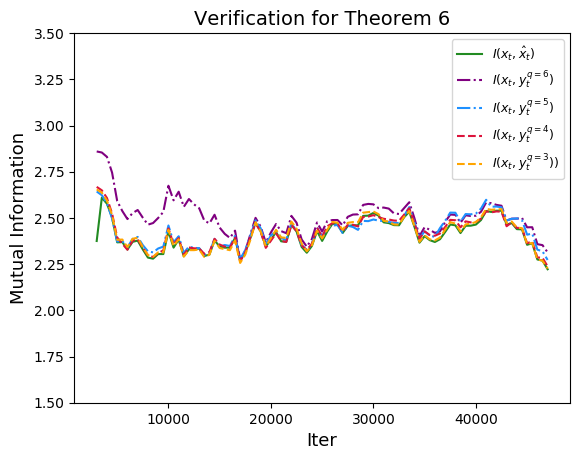

In [48]:
rgb_list,hex_list = generate_colors(12,'cubehelix')
print(rgb_list)
print(hex_list)
#plt.plot(Ts,Isshat_3,label='$I(x_t,\hat{x}_t)$',color='royalblue',linestyle='-.')
#plt.plot(Ts,Isshat_m,label='I(xt,xt_hat_m)')
#plt.plot(Ts,I_xt_yt_1s,label='$I(x_t,y_{t}^{q=2})$',color='orange',linestyle=':')
#plt.plot(Ts,I_xt_yt_2s,label='$I(x_t,y_{t}^{q=4})$',color='g',linestyle=':')
#plt.plot(Ts,I_xt_yt_3s,label='$I(x_t,y_{t}^{q=6})$',color='purple',linestyle=':')
#plt.plot(Ts,I_xt_yt_4s,label='$I(x_t,y_{t}^{q=8})$',color='dodgerblue',linestyle=':')
plt.plot(Ts[6:95],Isshat_1_rol_mean[6:95],label='$I(x_t,\hat{x}_t)$',color='forestgreen')
plt.plot(Ts[6:95],I_xt_yt_1s_rol_mean[6:95],label='$I(x_t,y_{t}^{q=6})$',color='purple',linestyle='-.')
plt.plot(Ts[6:95],I_xt_yt_2s_rol_mean[6:95],label='$I(x_t,y_{t}^{q=5})$',color='dodgerblue',linestyle='-.')
plt.plot(Ts[6:95],I_xt_yt_3s_rol_mean[6:95],label='$I(x_t,y_{t}^{q=4})$',color='crimson',linestyle='--')
plt.plot(Ts[6:95],I_xt_yt_4s_rol_mean[6:95],label='$I(x_t,y_{t}^{q=3})$)',color='orange',linestyle='--')
#plt.plot(Ts,I_xt_xt1hat_ms,label='I(xt,xthat)m')
#plt.plot(Ts,errs,label='error')
plt.legend(loc='best',fontsize=9)
plt.ylim(1.5,3.5)
plt.title('Verification for Theorem 6',fontsize=14) 
plt.xlabel('Iter',fontsize=13)
plt.ylabel('Mutual Information',fontsize=13)
plt.savefig('Markov_Mutual_Information_rm.svg', dpi=600, format='svg')
plt.show()